# Data Mining

## Problem Statement

### Context

The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


### Objective

The objective of the analysis is to cluster the states based on the given dataset "State_wise_Health_income.csv," considering both health and economic indicators. By grouping states with similar conditions, the goal is to provide the government with valuable insights for implementing targeted measures to improve the health and economic conditions of each group.


###  Data Description

1. States: Names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4. Per_capita_income: Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing Libraries

In [223]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [224]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [225]:
# loading the dataset
data = pd.read_csv('State_wise_Health_income.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [226]:
data.shape

(296, 6)

* The dataset has 296 rows and 6 columns.

### Displaying few rows of the dataset

In [227]:
data.head(5)

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


### Creating a Copy of the Original Data

In [228]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [229]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         296 non-null    int64 
 1   States             296 non-null    object
 2   Health_indices1    296 non-null    int64 
 3   Health_indices2    296 non-null    int64 
 4   Per_capita_income  296 non-null    int64 
 5   GDP                296 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


- All the columns in the data are non-null. The columns 'Health_indices1', 'Health_indices2', 'Per_capita_income' and 'GDP' are integer datatypes variables, while 'States' is an object (string) column representing state names.

### Checking the missing values

In [230]:
# checking for missing values
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indices1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

- There are no missing values in the data.

### Checking the unique values

In [231]:
# checking the number of unique values in each column
df.nunique()

Unnamed: 0           296
States               296
Health_indices1      277
Health_indices2      248
Per_capita_income    278
GDP                  285
dtype: int64

### Dropping variables

**We will drop the *"Unnamed: 0* as it do not add any value to the analysis.**

In [232]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Statistical summary of the dataset

In [233]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indices1,296.0,2629.195946,2041.890970,-10.0,640.0,2446.5,4102.75,10219.0
Health_indices2,296.0,693.594595,469.738035,0.0,173.5,810.5,1076.00,1508.0
Per_capita_income,296.0,2159.597973,1493.663013,500.0,746.0,1869.0,3138.75,7049.0
GDP,296.0,174717.050676,167439.128587,22.0,8679.5,135748.5,314751.25,728575.0


**Observations**
*   The average Health Index (Health_indices1) across different states of the country is around 2630, with the highest being 10,219, and the lowest being -10.
*   The average GDP across the states is 167,439, with the highest for a state being 728,575 and lowest being 22.
*   These summary statistics show variations - with per capita income ranging from 500 to 7049, and GDP from 22 to 728575.








## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [234]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [235]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

#### `Health_indices1`

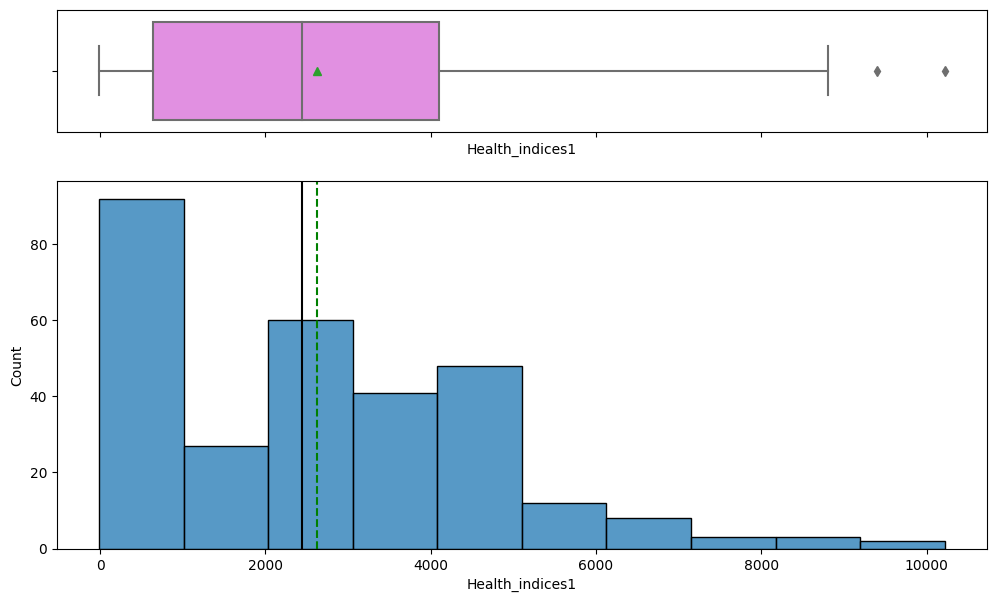

In [236]:
 histogram_boxplot(df, 'Health_indices1', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Health_indices1 variable

**Observations**

This attribute has right-skewed distribution.This means that for majority of the states, the overall Health_indices1 is on the lower side for most of the states. There are few states with Health_indices1 greater than 5000, with the average acorss all the states being between 2000 to 3000 (mean and median, both).The boxplot and the histogram of this variable indicate the presence of outliers.



#### `Health_indices2`

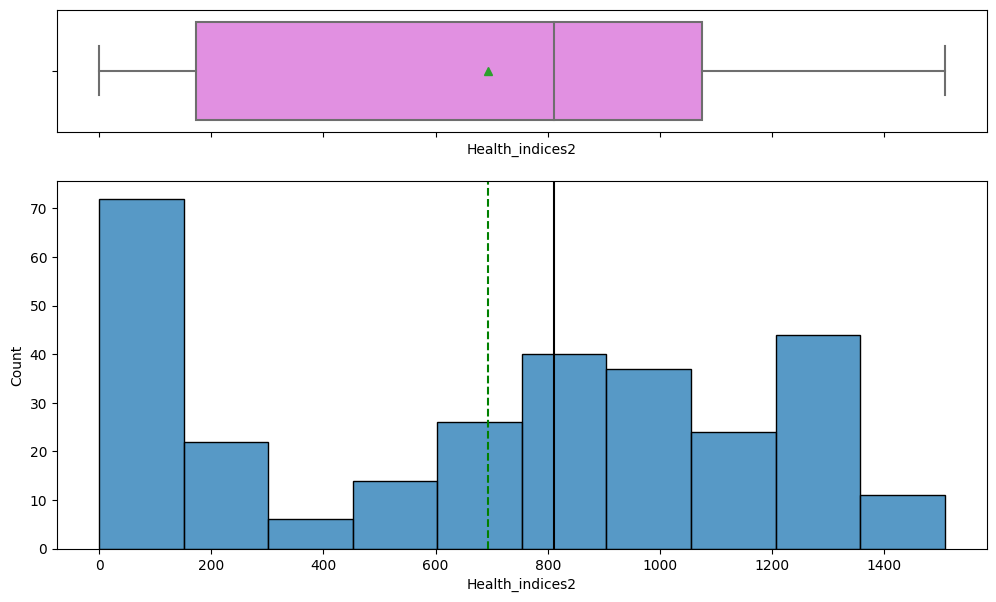

In [237]:
 histogram_boxplot(df, 'Health_indices2', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Health_indices2 variable

**Observations**
This attribute does not seem to follow conventional distributions.Majority of the states have Health_indices_2 score between 0 to less than 200. From the boxplot and the histogram, it appears that the variable does not have any outliers.


#### `Per Capita Income`

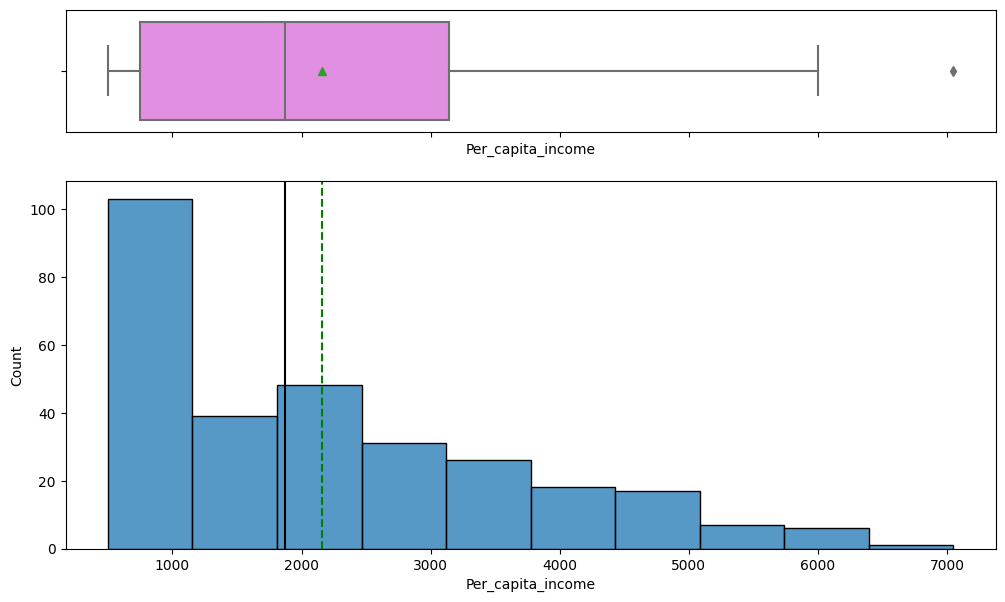

In [238]:
 histogram_boxplot(df, 'Per_capita_income', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Per_capita_income variable

**Observations**

PCI is financial data and is expected to have right-skewed distribution - meaning, that that majority of the data points, or states, have lower PCI. Few states have high PCI. Average PCI (median) is slightly less than 2000, with 75% of the states having around 3000 PCI. As observed from the plots, the variable has outliers.



#### `GDP`

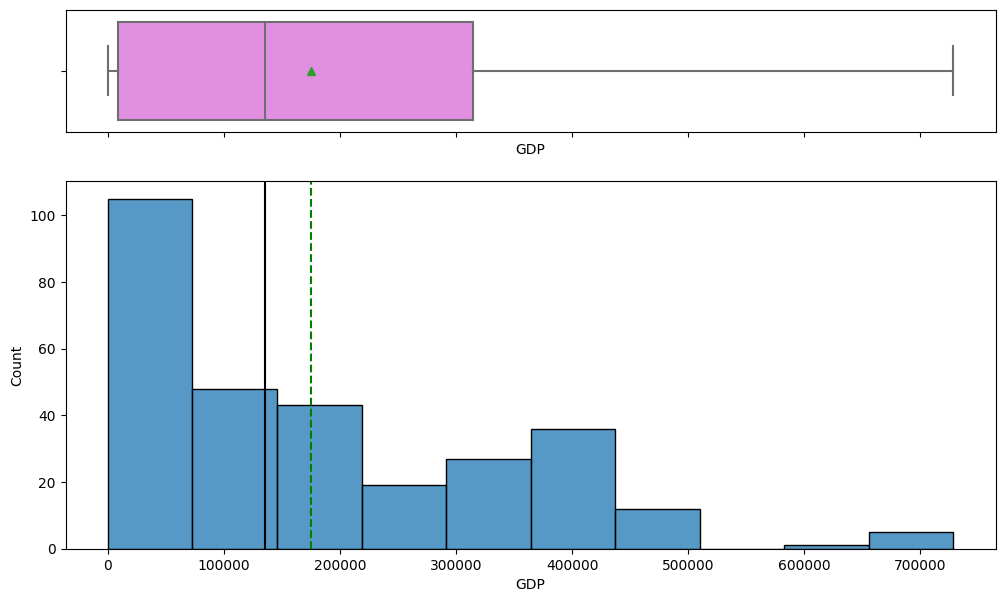

In [239]:
 histogram_boxplot(df, 'GDP', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of GDP variable

**Observations**

GDP being financial data is also right-skewed. Fewer states have GDP over 300,000, with average GDP across states being less than 200,000 (mean and median, both). There are outliers within this variable.


#### `States`

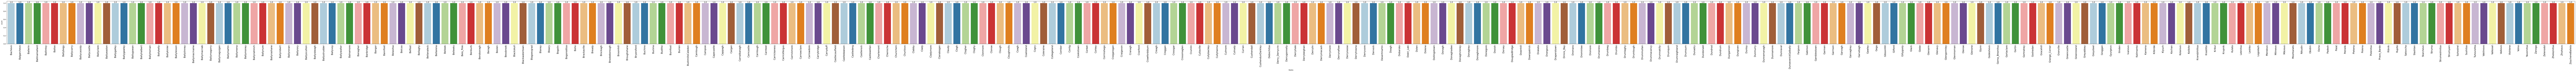

In [240]:
labeled_barplot(df, 'States', perc=False, n=None)                             ## Complete the code to get the labeled barplot of States variable

**Observations**
As observed during evaluation from unique values and this figure, there are 296 unique states within the dataset for which health and economic status scores have been provided.



#### Drop the variable

In [241]:
df.drop(columns=["States"], inplace=True)                  ## Drop the States variable

### CDF plot

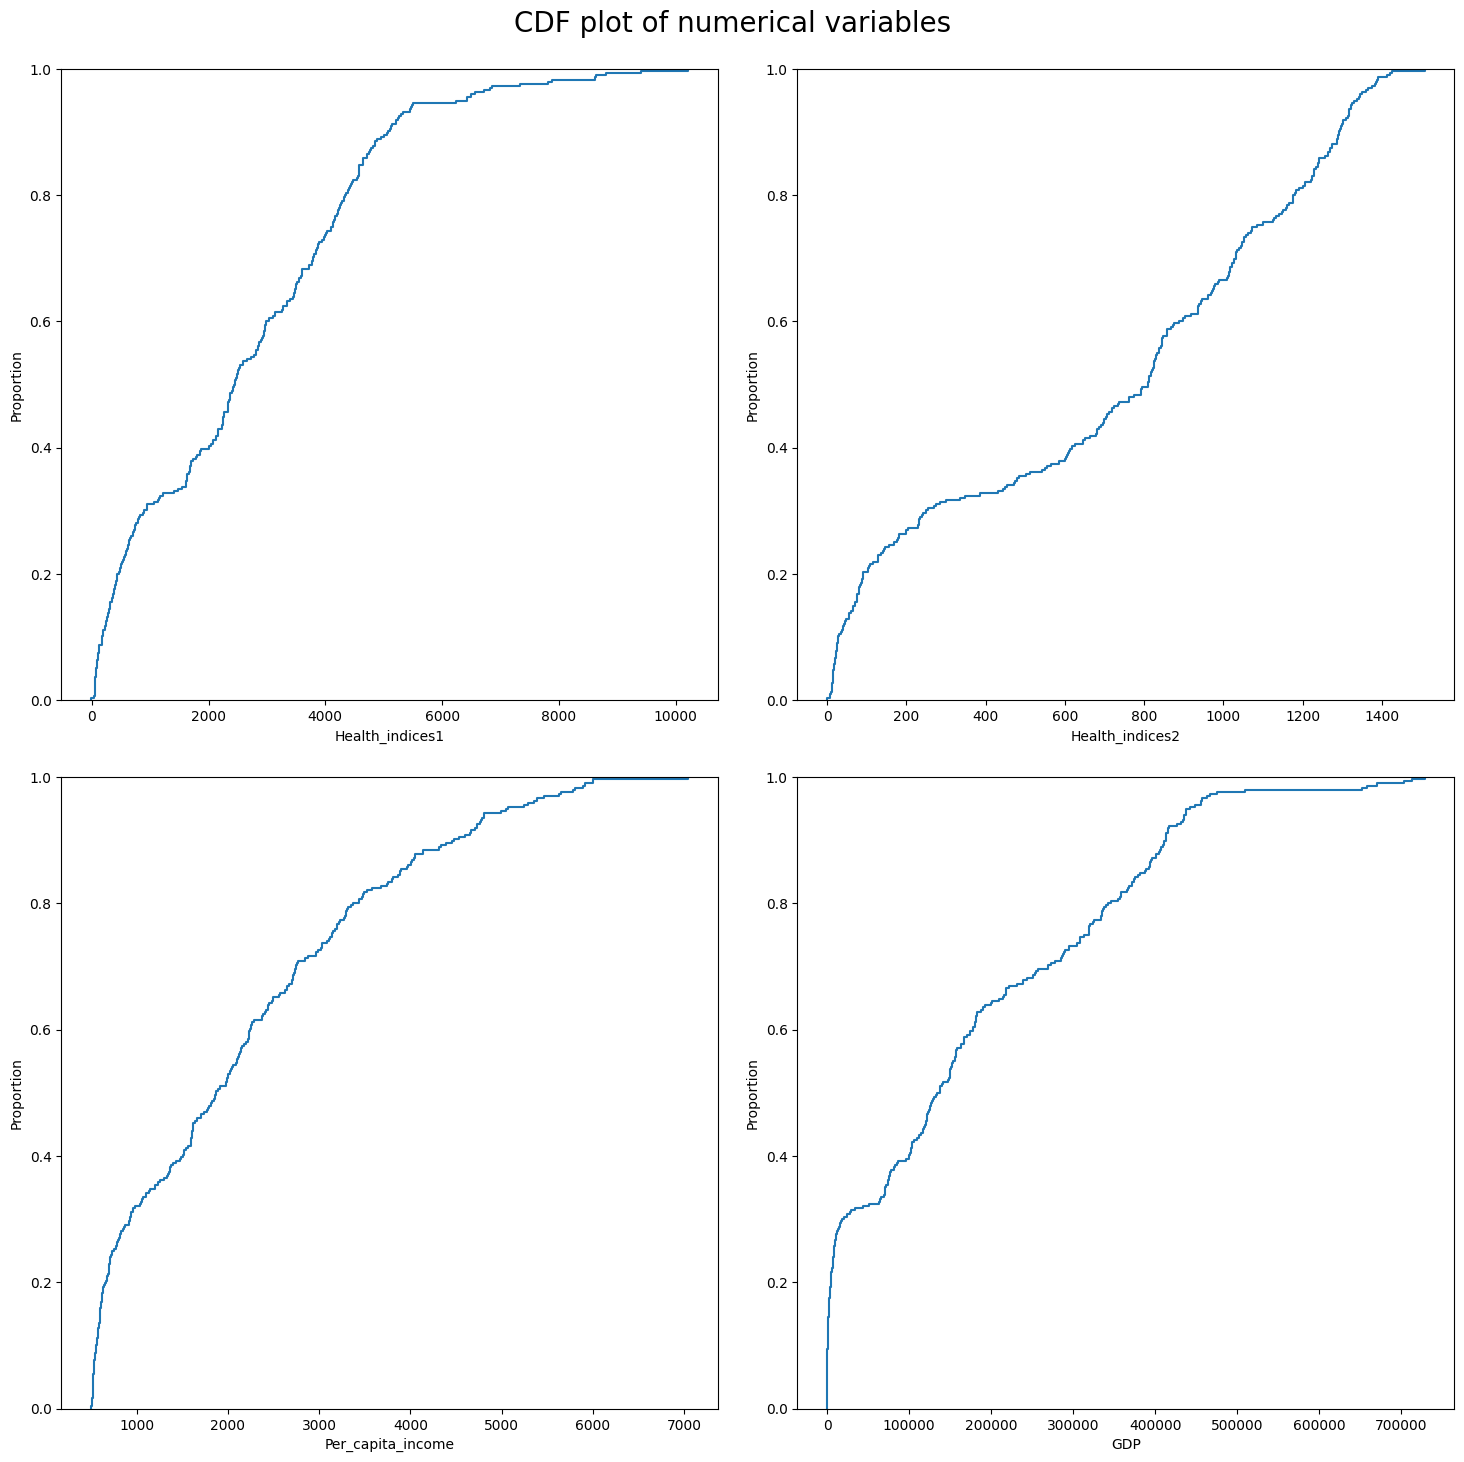

In [242]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0
column_names = df.columns.tolist()  # Get the list of column names

for ii in range(3):
    if counter < len(column_names):  # Check if the counter is within the list range
        sns.ecdfplot(data=df, ax=axes[ii][0], x=column_names[counter])
        counter += 1

    if counter < len(column_names):  # Check again before accessing the next column
        sns.ecdfplot(data=df, ax=axes[ii][1], x=column_names[counter])
        counter += 1

fig.tight_layout(pad=2.0)

**Observations**

These Cumulative Distribution Function plots of the numerical variables within the dataset show the cumulative probability of a random variable being less than or equal to a particular value. CDF plots assist in understanding the distribution of values for each numerical variable within the dataset and provide insights into the cumulative probability of observing specific values or less. **Hence, steeper slopes indicate concentration in the lower range of values, while flatter slopes suggest a more even distribution across values**.

Thus, it is observed that Health_indices1 CDF plot is quite steep, indicating, there are a higher proportion/concentration of states with low Health_indices1 score. Such a steep slope is also observed for Per_capita_income, indicating higher proportion/concentration of states have low PCI. The same can be said for GDP with its somewhat steep CDF plot.

CDF plot of Health_indices2 is flatter in comparison to the other 3 plots, indicating a somewhat even distribution of the Health_indices_2 scores across all the states within the dataset.



### Bivariate Analysis

**Let's check for correlations.**

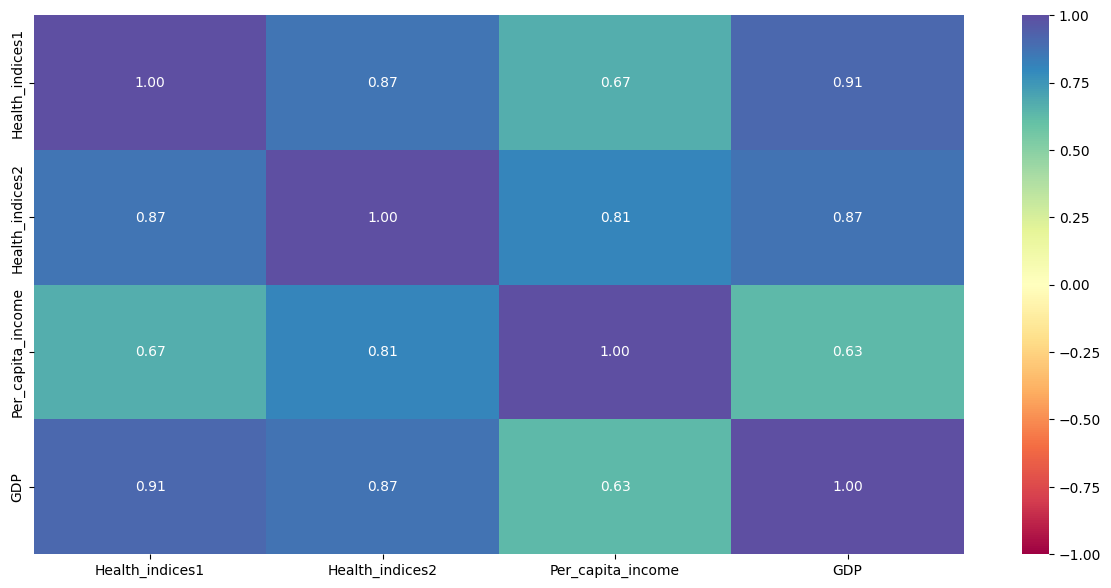

In [243]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

A correlation value greater than 0.8 indicates a strong positive linear relationship between two variables.  

- The attributes Health_indices1 and Health_indices2 have more than 80% positive correlation.
- GDP and Health_indices1, and GDP and Health_indices2, have more than 80% correlation.
- PCI and Health_indices_2 has more that 80% correlation.

**Pair plot**

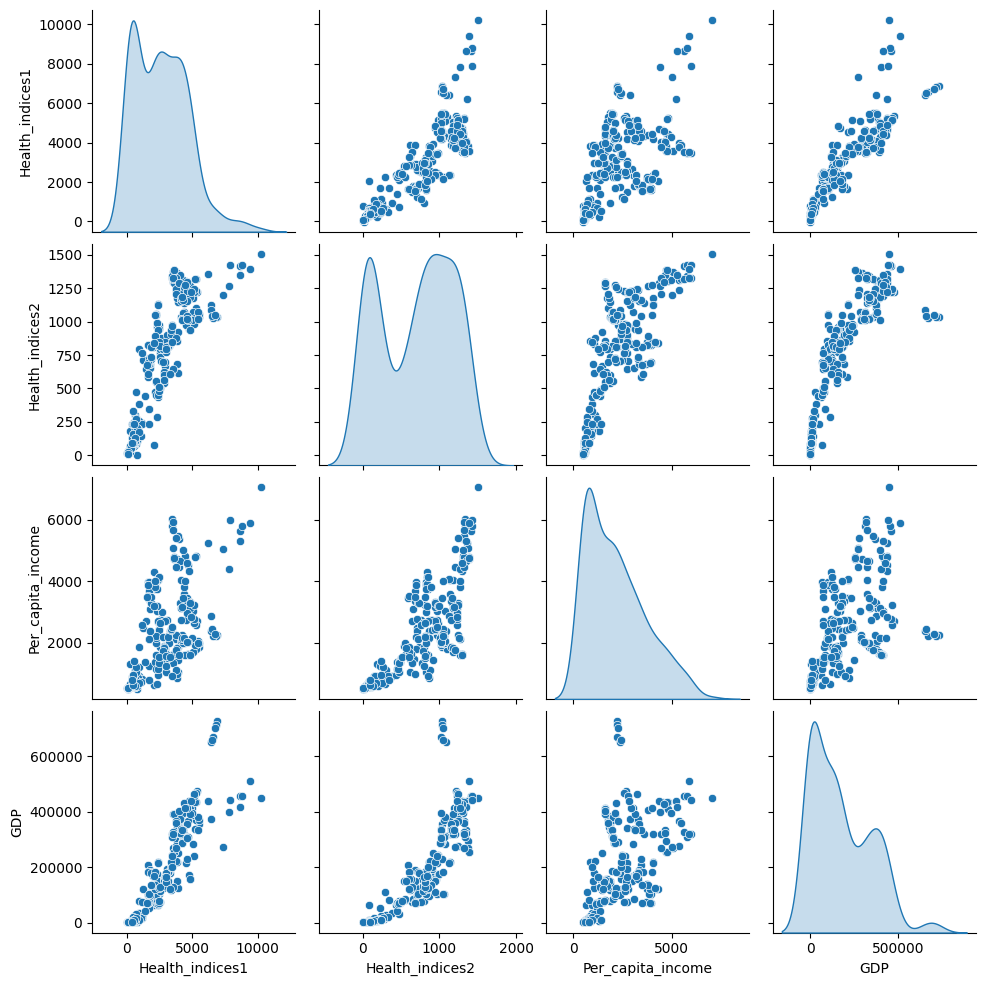

In [244]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**

As observed from the correlation matrix, and the above scatter plots, there are postive correlations observed amongst the numerical variables in the dataset.

Upon observing closely, some non-linear relationships are also observed, e.g., Health_indices1 and Health_indices2; Health_indices2 and PCI; Health_indices2 and GDP.


**We can add a hue and see if we can see some clustered distributions.**

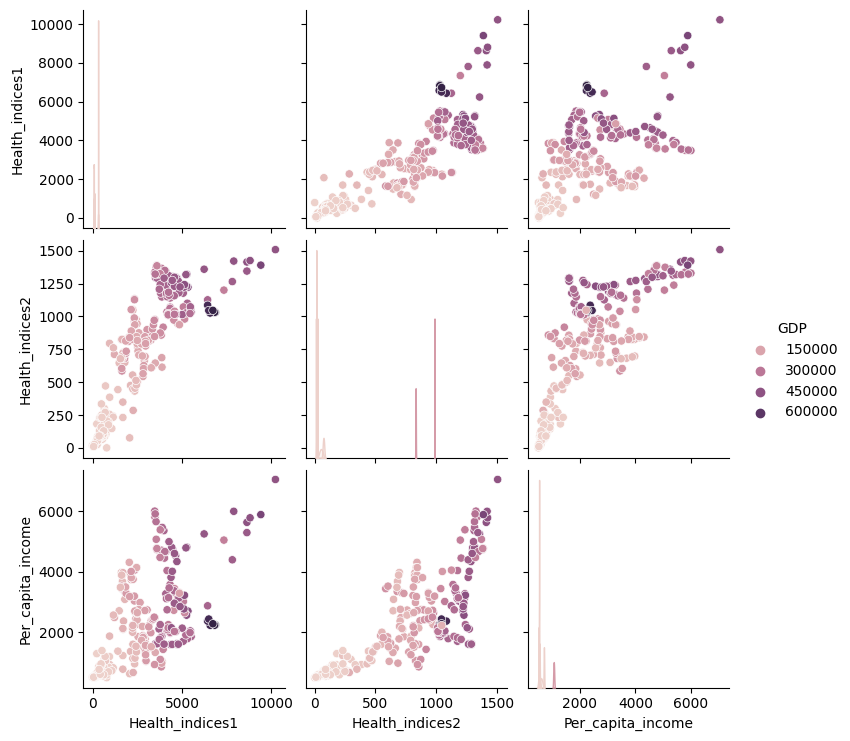

In [245]:
sns.pairplot(
    data=df[
        [
            "Health_indices1",
            "Health_indices2",
            "Per_capita_income",
            "GDP",
        ]
    ],
    hue="GDP",
)

plt.show()

**Observations**

A general trend that is observed for Health_indices1 and Health_indices2 scores with GDP is that GDP is higher for data points with high health indices scores. Similarly, GDP is higher for data points with high PCI and health index scores.





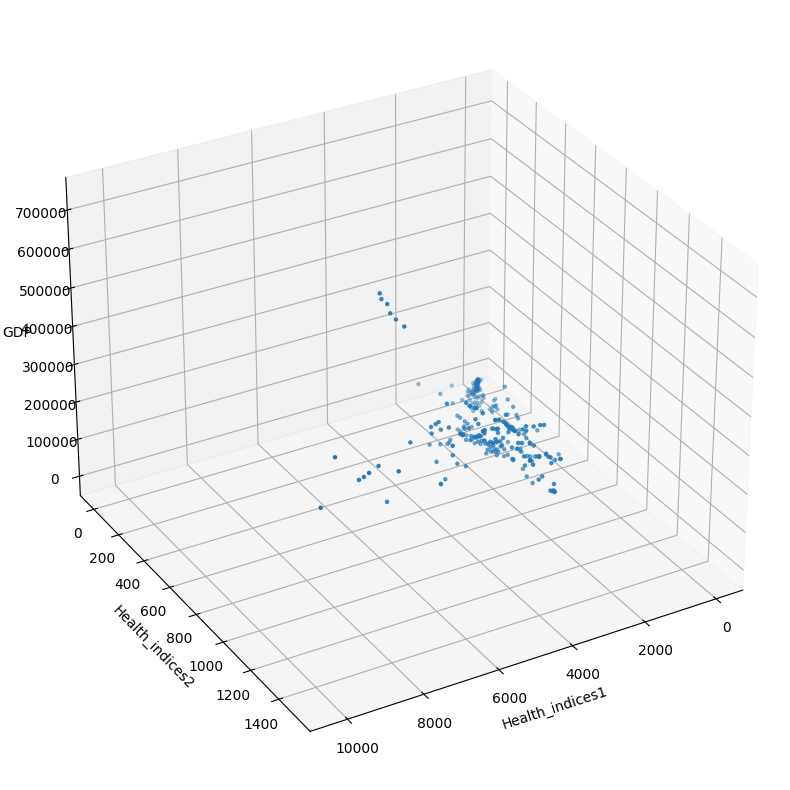

In [246]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Health_indices1"]
y = df["Health_indices2"]
z = df["GDP"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Health_indices1")
ax.set_ylabel("Health_indices2")
ax.set_zlabel("GDP")
ax.view_init(azim=60)
plt.show()

**Observations**
At the early stage of exploratory analysis, the 3D scatter plot assists in visualising the distribution of states based on their values in "Health_indices1", "Health_indices2", and "GDP". The spatial arrangement of points may reveal patterns or clusters in the data.

A few data points are observed to have very high GDP values. These data points could be either outlier states with very high GDP. However, there are data points with higher health indices scores but much lower GDP, seemingly concentrated in the fourth quadrant.There are few data points with low Health_indices1 scores.

## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score using the threshold you got in the above plot.

In [247]:
threshold = 3
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Health_indices1 : [8802, 9403, 10219]

 Health_indices2 : []

 Per_capita_income : [7049]

 GDP : [703190, 713295, 728575]


**Observations**
Identification of outliers is done based on a threshold of 3 standard deviations from the mean.

Health_indices1 outliers are [8802, 9403, 10219].
Three states have high values for "Health_indices1" that are considered outliers. These states may exhibit significantly different characteristics in terms of health indices compared to the majority.

There are no identified outliers for "Health_indices2".

Per_capita_income outlier is [7049]. One state has a high per capita income value (7049), considered an outlier compared to the rest.

GDP Outliers are [703190, 713295, 728575].
Three states have high GDP values that are considered outliers. These states may significantly differ in terms of economic output compared to others.


### Scaling

- Let's scale the data before we proceed with clustering.

In [248]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

In [249]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Hierarchical Clustering

In [250]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [251]:
# Calculate linkage using different methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}
for method in methods:
    linkage_matrix = linkage(subset_scaled_df, method=method)                           ## Complete the code to apply different linkage on the scaled data
    linkage_matrices[method] = linkage_matrix

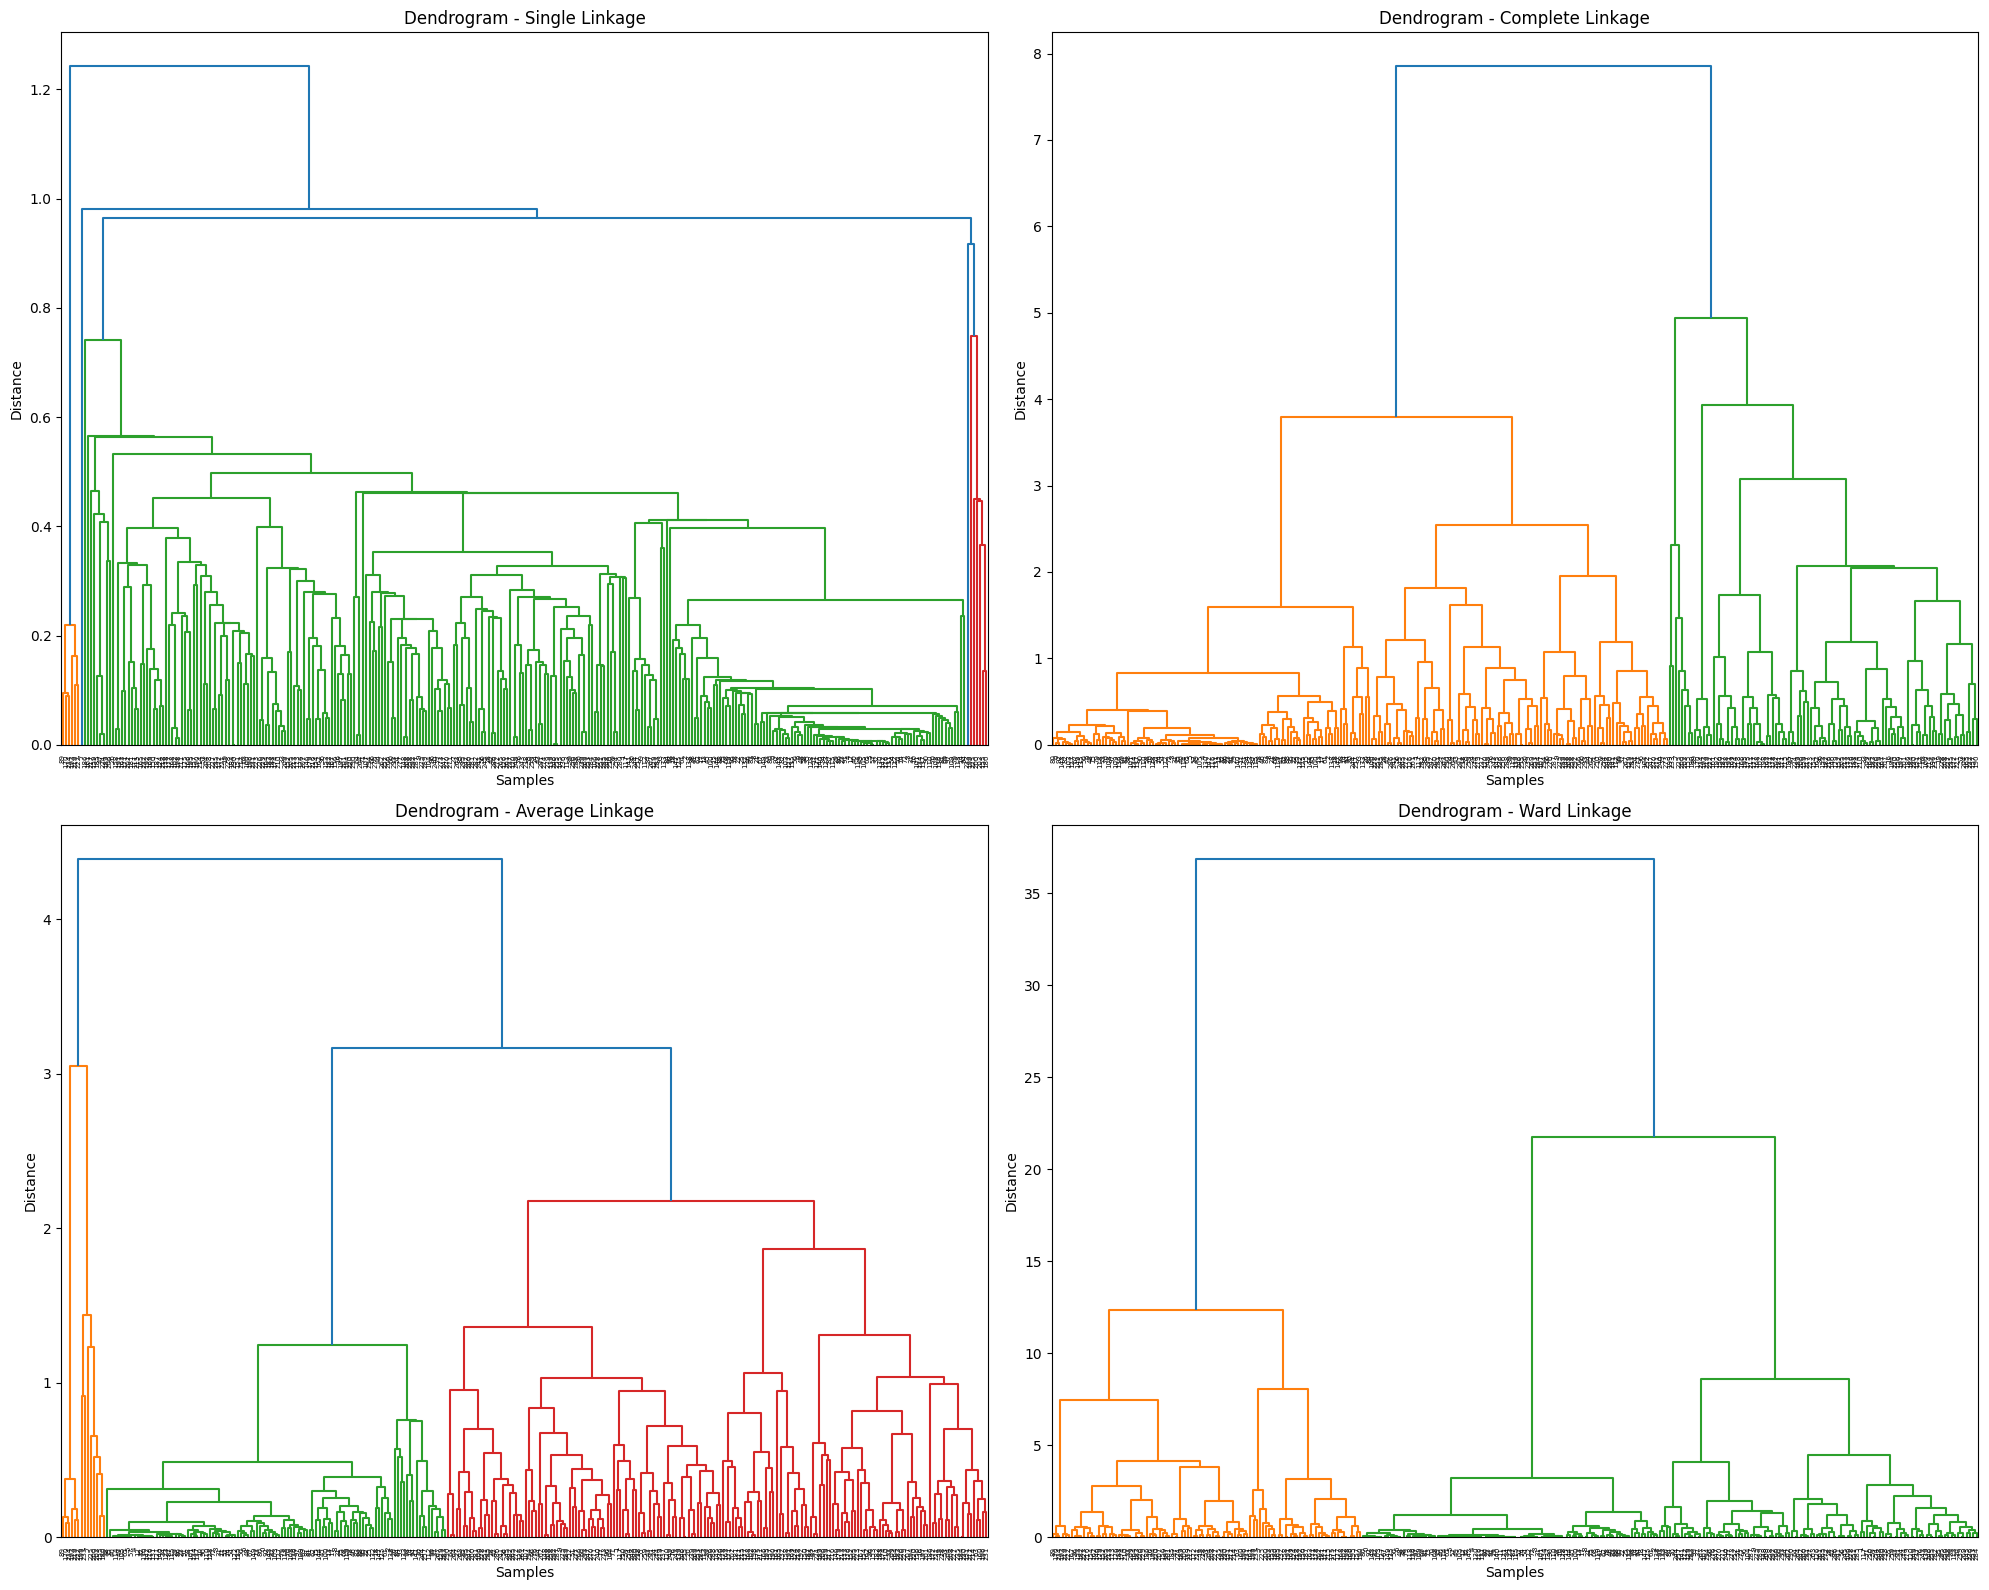

In [252]:
plt.figure(figsize=(20, 16))
for method, linkage_matrix in linkage_matrices.items():
    plt.subplot(2, 2, methods.index(method) + 1)
    dendrogram(linkage_matrix, orientation='top')                                ## Complete the code to add linkage_matrix
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

**Observations**
Upon examining the dendrograms, it is observed that when Ward Linkage is applied, well separated clusters are obtained. The dendrogram follows a clear, hierarchical structure in this case. The clusters are merging at a higher vertical distance/height, indicating the distinctness of the clusters.

In [253]:
linkage_matrix_ward = linkage(subset_scaled_df, method='ward')                        ## Complete the code to apply to the best linkage you got from the above dendrogram
max_d = 7  # Maximum distance threshold for forming clusters
clusters = fcluster(linkage_matrix_ward, t=max_d, criterion='distance')              ## Complete the code to apply linkage_matrix_ward

num_clusters = len(np.unique(clusters))
print(f"Number of clusters determined using Ward linkage: {num_clusters}")

Number of clusters determined using Ward linkage: 7


#### Lets check silhouette score

In [254]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
hc_df = subset_scaled_df.copy()
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5005875144522923
For n_clusters = 3, silhouette score is 0.5260929381868132
For n_clusters = 4, silhouette score is 0.5374753668213341
For n_clusters = 5, silhouette score is 0.5136233841673663
For n_clusters = 6, silhouette score is 0.5251014259304009
For n_clusters = 7, silhouette score is 0.5475499898084455
For n_clusters = 8, silhouette score is 0.5214864942797744
For n_clusters = 9, silhouette score is 0.494016002953426


**From the above score, find the appropriate number of clusters to build the model**

### Creating final model

In [255]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")    ## Complete the code to add the appropriate number of clusters
HCmodel.fit(hc_df)

CPU times: user 8.65 ms, sys: 1.98 ms, total: 10.6 ms
Wall time: 6.71 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [256]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [257]:
# subset_scaled_df["HC_Clusters"] = HCmodel.labels_
# df["HC_Clusters"] = HCmodel.labels_

## K-means Clustering

In [258]:
k_means_df = subset_scaled_df.copy()

In [259]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [260]:
wss =[]
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

### Checking Elbow Plot

Text(0, 0.5, 'WSS')

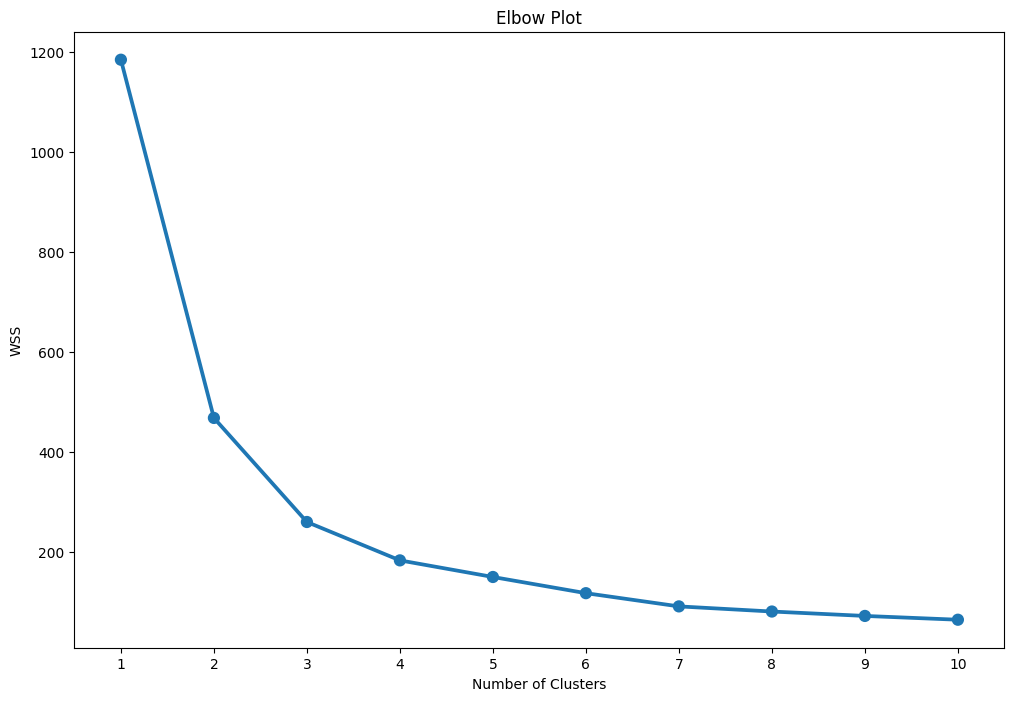

In [261]:
plt.figure(figsize=(12,8))
sns.pointplot(x=a, y=wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

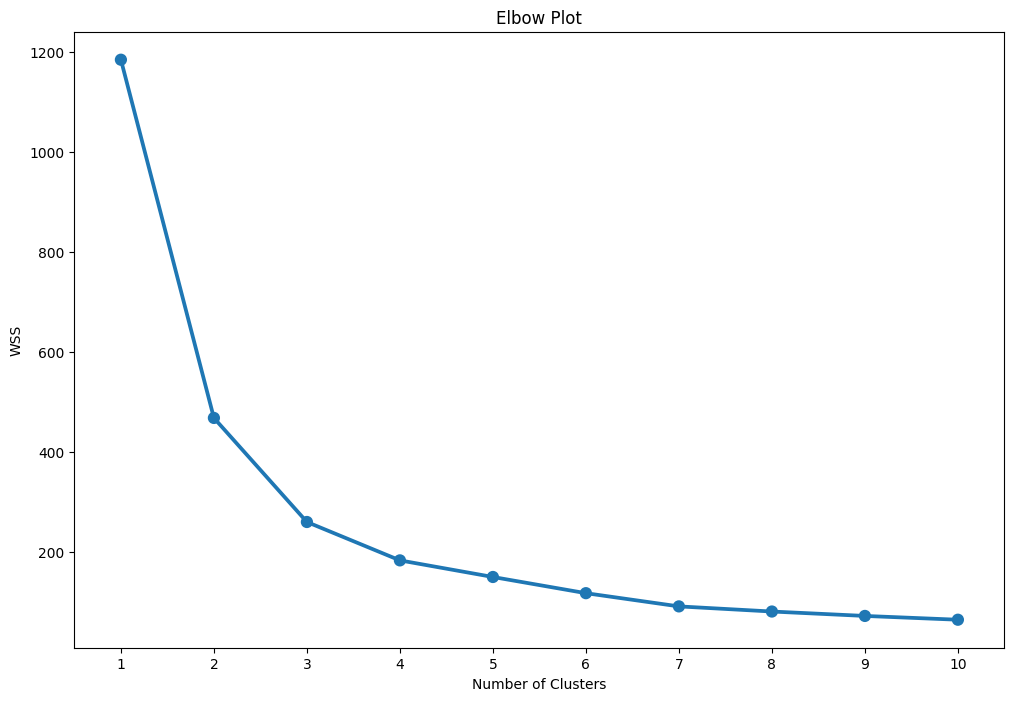

In [262]:
# Create a DataFrame from 'a' and 'wss'
data1 = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Plot the data using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(data=data1, x='Number of Clusters', y='WSS')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.show()

Optimal number of clusters could be either 3 or 4, based on the Elbow Plot.

### Checking Silhouette Scores

In [263]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)                 ## Complete the code to apply KMeans
 y=clusterer.fit_predict(k_means_df)                                                          ## Complete the code to predict on k_means_df
 s =silhouette_score(k_means_df, y )                                                          ## Complete the code to get the silhouette score of k_means_df
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.53121
The Average Silhouette Score for 3 clusters is 0.53353
The Average Silhouette Score for 4 clusters is 0.55225
The Average Silhouette Score for 5 clusters is 0.55701
The Average Silhouette Score for 6 clusters is 0.53076
The Average Silhouette Score for 7 clusters is 0.55395
The Average Silhouette Score for 8 clusters is 0.53008
The Average Silhouette Score for 9 clusters is 0.50449
The Average Silhouette Score for 10 clusters is 0.49018


**From the silhouette scores, find which k value has highest value and have elbow in elbow curve.**

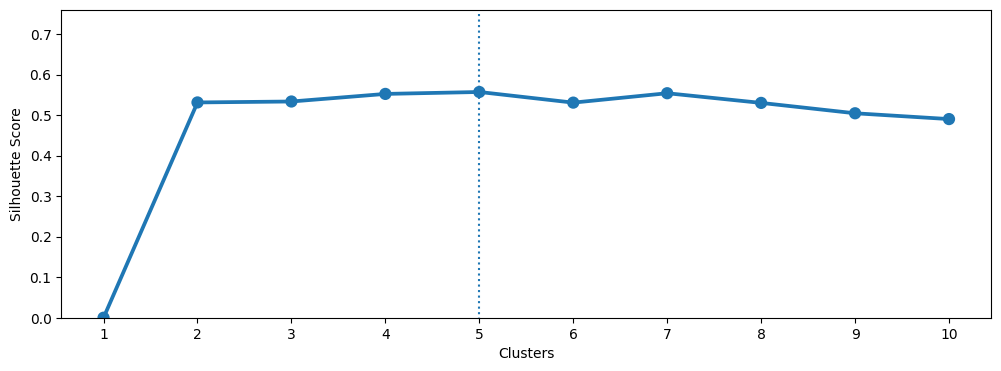

In [264]:
# Create a DataFrame from the dictionary
data_df = pd.DataFrame(list(ss.items()), columns=['Clusters', 'Silhouette Score'])

# Plot the data using sns.pointplot
maxkey = data_df['Silhouette Score'].idxmax() + 2  # Find the key with the maximum Silhouette Score
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data_df, x='Clusters', y='Silhouette Score')
plt.vlines(x=maxkey - 2, ymax=0, ymin=0.75, linestyles='dotted')
ax.set(ylim=(0, 0.76))
plt.show()

Silhouette score is highest for k=5. However, the elbow plot suggested 3 or 4 clusters as optimal k. These k values also have similar silhouette scores as k=5. Based on elbow plot and silhouette scores, k = 4 should be an optimal number of clusters.

In [265]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state = 1)          ## Complete the code apply KMeans with appropriate number of clusters which you got from above plots

kmeans.fit_predict(k_means_df)                                                         ## Complete the code to predict the KMeans on k_means_df

array([1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 1, 0, 1, 2, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 3, 3, 0, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [266]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [267]:
df1.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,K_means_segments
0,417,66,564,1823,1
1,1485,646,2710,73662,0
2,654,299,1104,27318,1
3,192,25,573,250,1
4,43,8,528,22,1


### Cluster Profiling

In [268]:
df1.K_means_segments.value_counts()                  ## Find the value_counts of each of the K_means_segments

1    101
0    100
3     59
2     36
Name: K_means_segments, dtype: int64

In [269]:
clust_profile=df1
clust_profile=clust_profile.groupby('K_means_segments').mean()
clust_profile['freq']=df1.K_means_segments.value_counts().sort_index()
np.round(clust_profile,2).T

K_means_segments,0,1,2,3
Health_indices1,2593.93,499.16,5146.44,4799.36
Health_indices2,783.80,116.36,1327.14,1142.29
Per_capita_income,2475.14,693.77,5047.08,2372.22
GDP,141273.93,9428.10,367196.92,396907.24
freq,100.00,101.00,36.00,59.00


**Observations**

There are 4 clusters obtained as a result of k-means clustering.

Cluster 0: 100 data points.

Cluster 1: 101 data points.

Cluster 2: 36 data points.

Cluster 3: 59 data points.

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [270]:
km_cluster_profile = df1.groupby("K_means_segments").mean()        ## Complete the code to group the data using K_means_segments

In [271]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Per_capita_income"].count().values
)

In [272]:
km_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
K_means_segments,,,,,
0,2593.930000,783.800000,2475.140000,141273.930000,100
1,499.158416,116.356436,693.772277,9428.099010,101
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,4799.355932,1142.288136,2372.220339,396907.237288,59


**Observations**

Cluster 0: The average GDP of this cluster is 141,274. This somewhat lies in the middle when compared to the rest of the clusters. The health index scores and PCI are also somewhat in the middle, when compared to other clusters.

Cluster 1: The average GDP of this cluster is 9428. This is the lowest when compared to the rest of the clusters. This cluster happens to have the lowest average PCI, and lowest average health index scores.

Cluster 2: The average GDP of this cluster is 367,196. This is the second highest when compared to the rest of the clusters. The cluster has the highest average PCI, and highest average health index scores.

Cluster 3: The average GDP of this cluster is 396,907. This is the highest when compared to the rest of the clusters. The cluster has the second highest average PCI, and average health index scores.

### Cluster Profiling: Hierarchical Clustering

In [273]:
hc_cluster_profile = df2.groupby("HC_segments").mean()         ## Complete the code to group the data using K_means_segments

In [274]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Per_capita_income"].count().values
)

In [275]:
hc_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,2518.715909,802.022727,2535.636364,145730.011364,88
1,4601.105263,1138.982456,2432.368421,350721.543860,57
2,634.532110,144.614679,751.981651,14274.229358,109
3,6649.333333,1044.000000,2299.833333,687649.666667,6
4,8927.666667,1417.166667,5940.166667,454834.333333,6
5,4162.750000,1314.607143,4879.035714,350573.285714,28
6,7574.500000,1232.500000,4720.500000,337015.500000,2


**Observations**

When compared with k-means clustering, hierarchical clustering suggests more number of clusters. A few of these clusters such as clusters 3, 4 and 6 have very few data points. With that in consideration, k-means clsutering seems to be performing better.

### K-means vs Hierarchical Clustering

In [276]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
K_means_segments,,,,,
0,2593.930000,783.800000,2475.140000,141273.930000,100
1,499.158416,116.356436,693.772277,9428.099010,101
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,4799.355932,1142.288136,2372.220339,396907.237288,59


In [277]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,2518.715909,802.022727,2535.636364,145730.011364,88
1,4601.105263,1138.982456,2432.368421,350721.543860,57
2,634.532110,144.614679,751.981651,14274.229358,109
3,6649.333333,1044.000000,2299.833333,687649.666667,6
4,8927.666667,1417.166667,5940.166667,454834.333333,6
5,4162.750000,1314.607143,4879.035714,350573.285714,28
6,7574.500000,1232.500000,4720.500000,337015.500000,2


<Axes: xlabel='K_means_segments'>

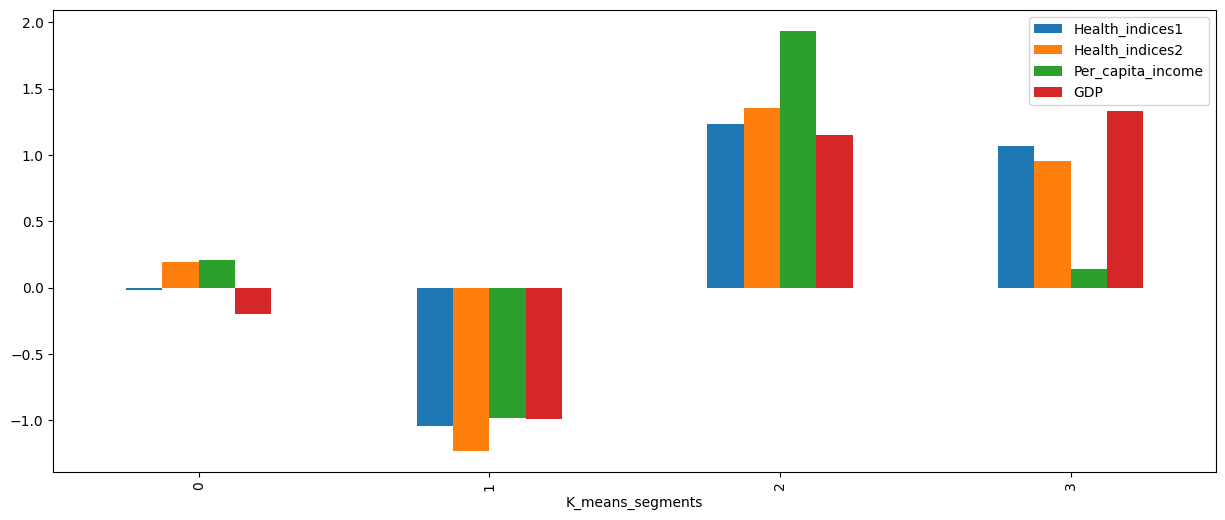

In [278]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

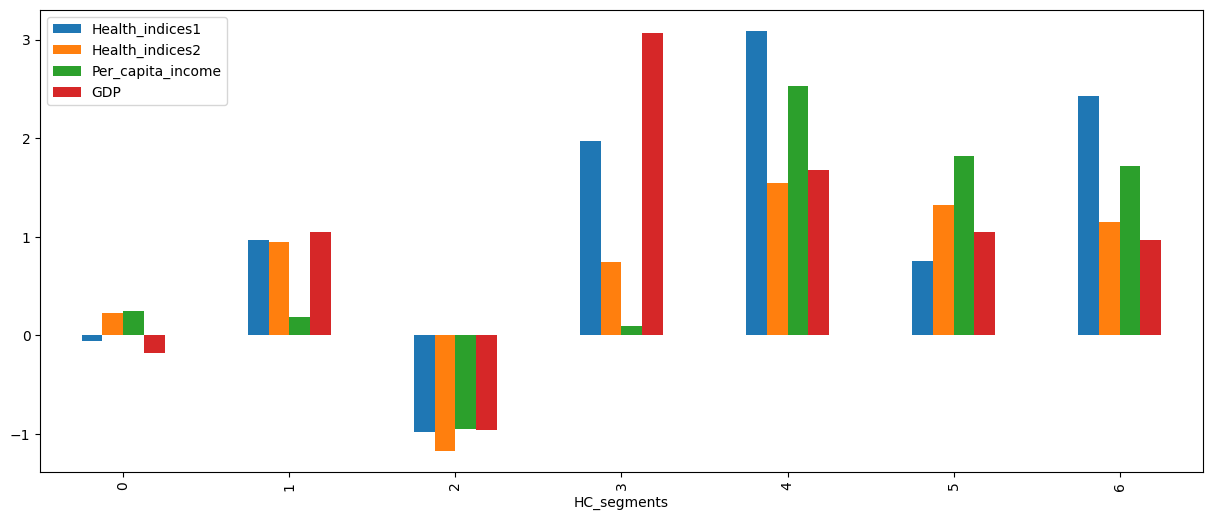

In [279]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

**Observations**

K-Means Clustering

There are 4 clusters suggested by this method of clustering. Though four, we observe 3 distinct groups to appear within the dataset:

  - Excellent Health and Economic Conditions: Cluster 2 and 3. As deciphered from the graphs, these clusters have highest average PCI, GDP, as well as health index scores.
  - Adequate Health and Economic Conditions: Cluster 0. As deciphered from the graphs, these clusters have medium level PCI, GDP, as well as health index scores.
  - Poor Health and Economic Conditions: Clsuter 1: As deciphered from the graphs, these clusters have lowest average PCI, GDP, as well as health index scores.

Most data points belong to the Adequate/Poor Health and Economic Conditions.

Hierarchical Clustering

- Cluster 4 has the highest average health index scores, and second highest GDP, but very few data points. Clsuter 3 is similar to Cluster 4 in these aspects.
- The cluster with highest number of instances is Cluster 2, which happens to have lowest average health index scores, PCI, and GDP.
- There does not appear to be a clear distinction amongst, but the remaining clusters fall within the category of intermediate health scores and economic conditions.

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

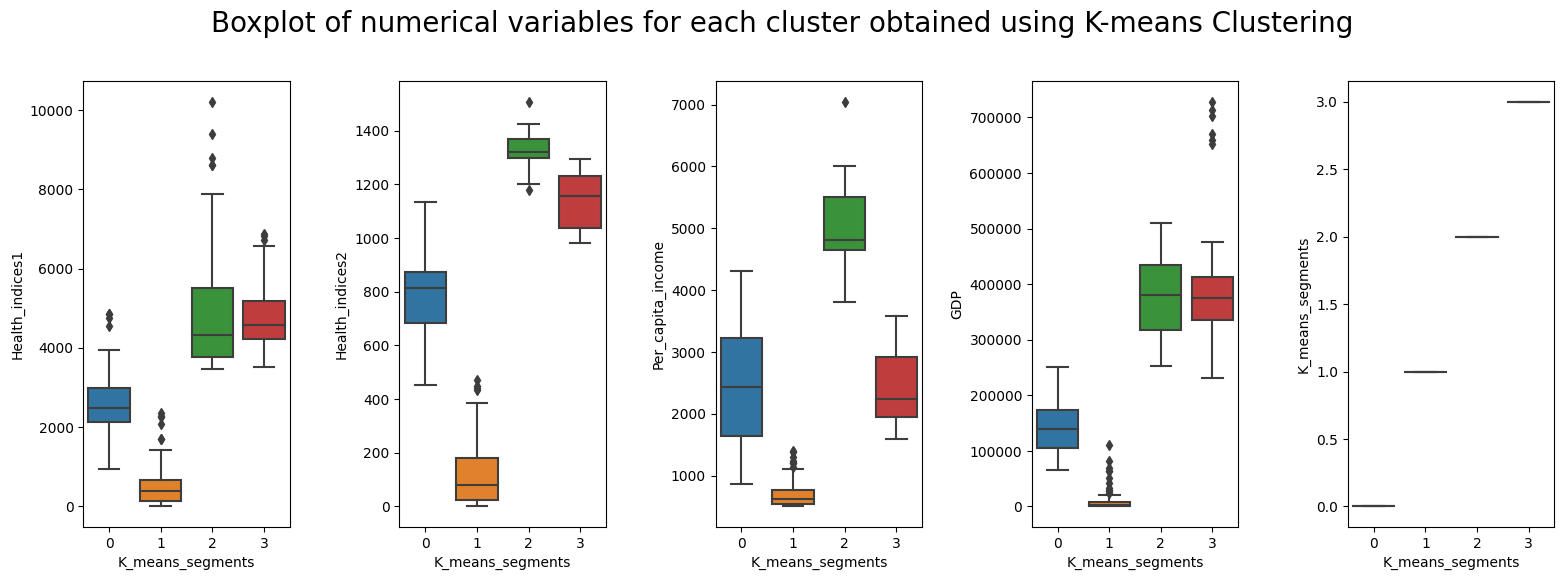

In [280]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

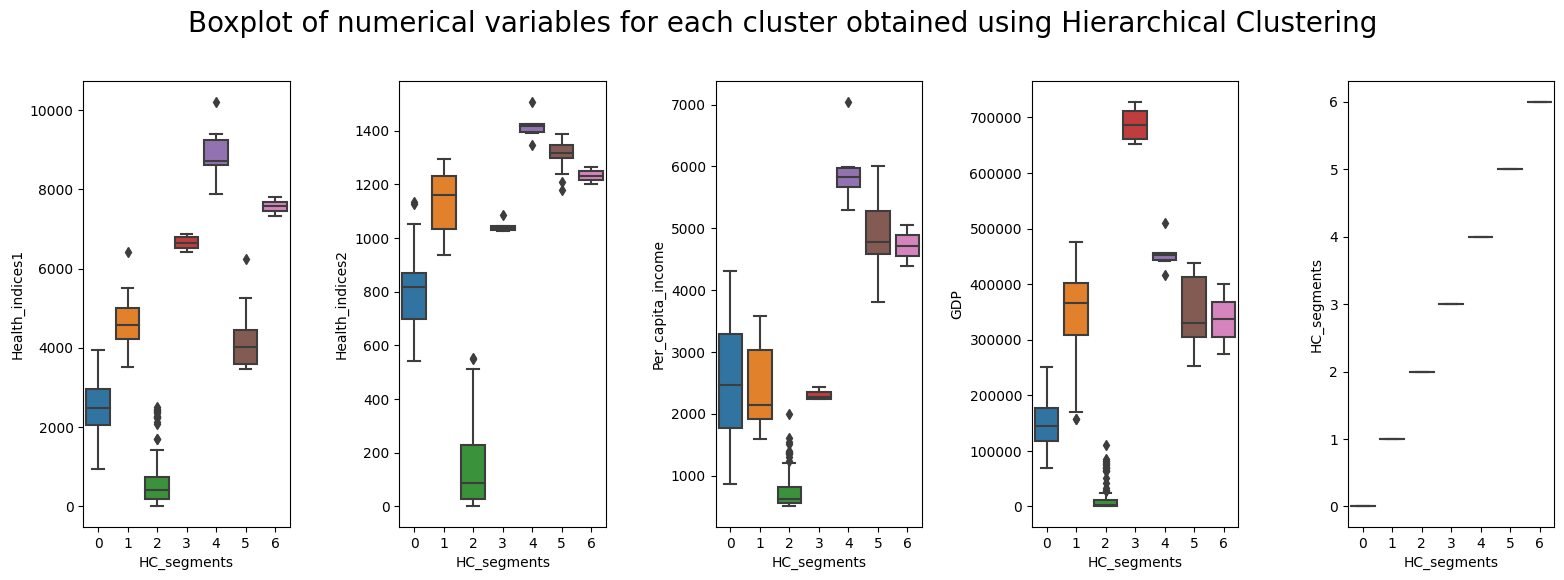

In [281]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

### Cluster Comparison

**Observations**

K Means Clustering suggests a clear distinction amongst the different groups within the dataset, and 3 profiles were obtained:

- Excellent Health and Economic Conditions
- Adequate Health and Economic Conditions
- Poor Health and Economic Conditions

Such a clear distinction is not obtained with Hierarchical Clustering. However, analysis reveals formation of similar cluster profiles. Elite, high-income groups have higher average health index scores, and vice versa.



### Insights

The insights derived from K-Means clustering, and to a certain extent, hierarchical clustering, offer valuable information for governmental bodies and their counterparts. These findings suggest that marginalized communities, as well as states with lower average GDP and income levels, may encounter challenges in accessing adequate health facilities. This, in turn, contributes to a decline in their health index scores.

### Business Recommendations

States affected with low/medium PCI and GDP should be focused on. Government may involve itself in creating employment opportunities in these areas. Improvement in economic conditions can aid of improvment in health conditions.


# PCA

## Problem Statement

### Context

The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.


### Objective

Apply Principal Component Analysis (PCA) on the 'Hair Salon.csv' dataset, which encompasses various variables related to a salon chain's market segmentation. The goal is to analyze and interpret the principal components


###  Data Description

1. ProdQual: Product Quality
2. Ecom: E-Commerce
3. TechSup: Technical Support
4. CompRes: Complaint Resolution
5. Advertising: Advertising
6. ProdLine: Product Line
7. SalesFImage: Salesforce Image
8. ComPricing: Competitive Pricing
9. WartyClaim: Warranty & Claims
10. OrdBilling: Order & Billing
11. DelSpeed: Delivery Speed
12. Satisfaction: Customer Satisfaction

## Loading the dataset

In [282]:
data = pd.read_csv('Hair Salon.csv')    ## Complete the code to read the dataset

In [283]:
data.head(5)            ## Complete the code to check the head

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [284]:
data.drop(['ID','Satisfaction'],axis=1, inplace = True)     ## Complete the code to drop the ID and Satisfaction columns

## Exploratory Data Analysis

### Univariate Analysis

#### `ProdQual`

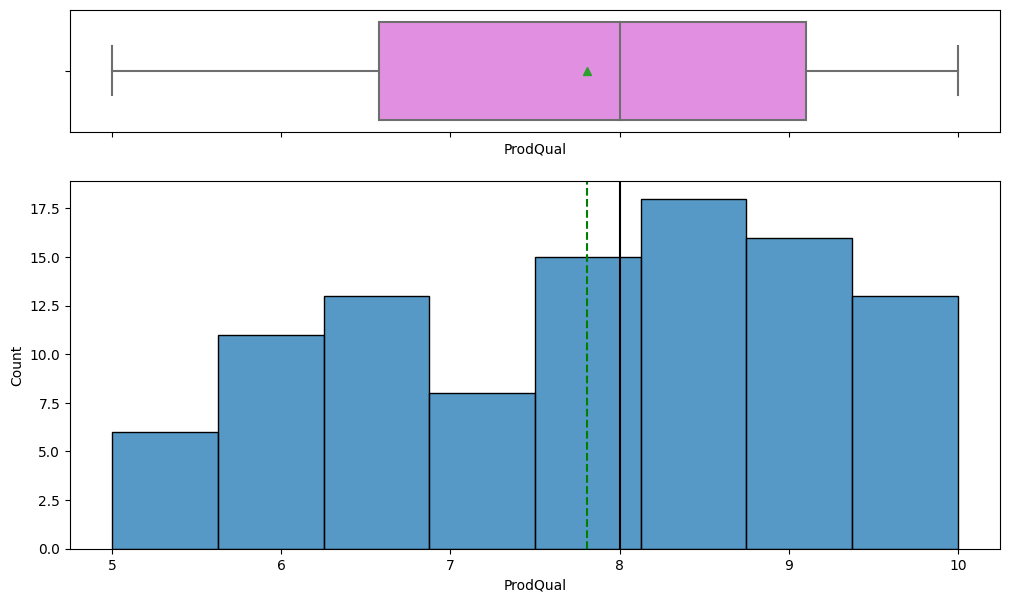

In [285]:
histogram_boxplot(data, 'ProdQual', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdQual

#### `Ecom`

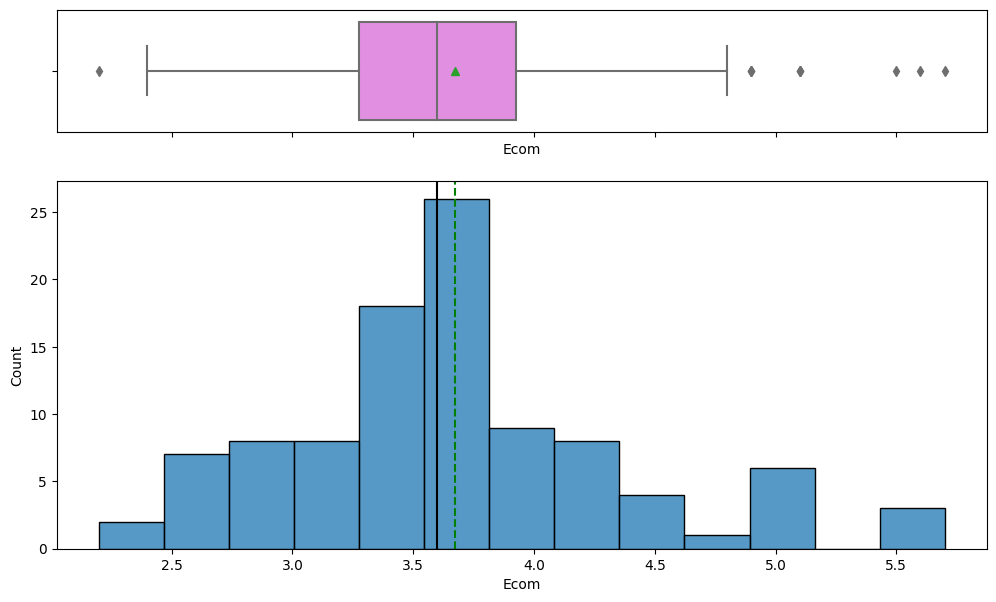

In [286]:
histogram_boxplot(data, 'Ecom', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Ecom

#### `TechSup`

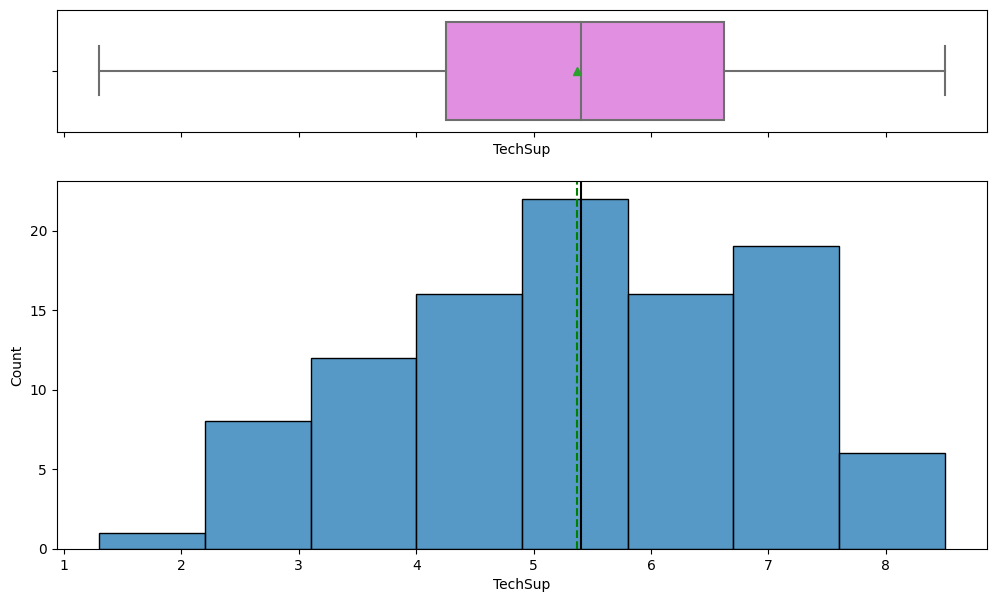

In [287]:
histogram_boxplot(data, 'TechSup', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for TechSup

#### `CompRes`

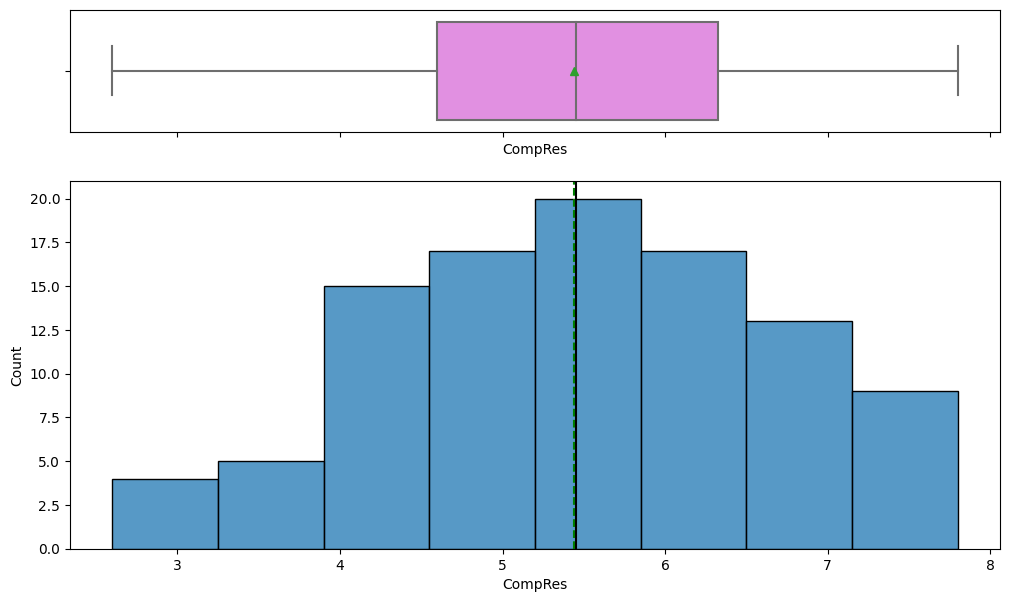

In [288]:
histogram_boxplot(data, 'CompRes', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for CompRes

#### `Advertising`

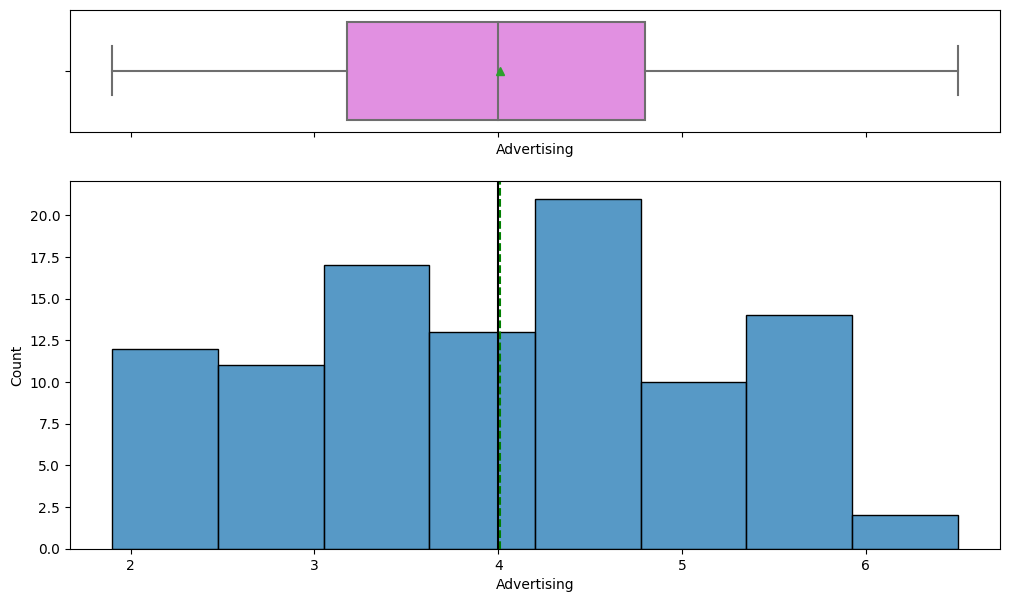

In [289]:
histogram_boxplot(data, 'Advertising', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Advertising

#### `ProdLine`

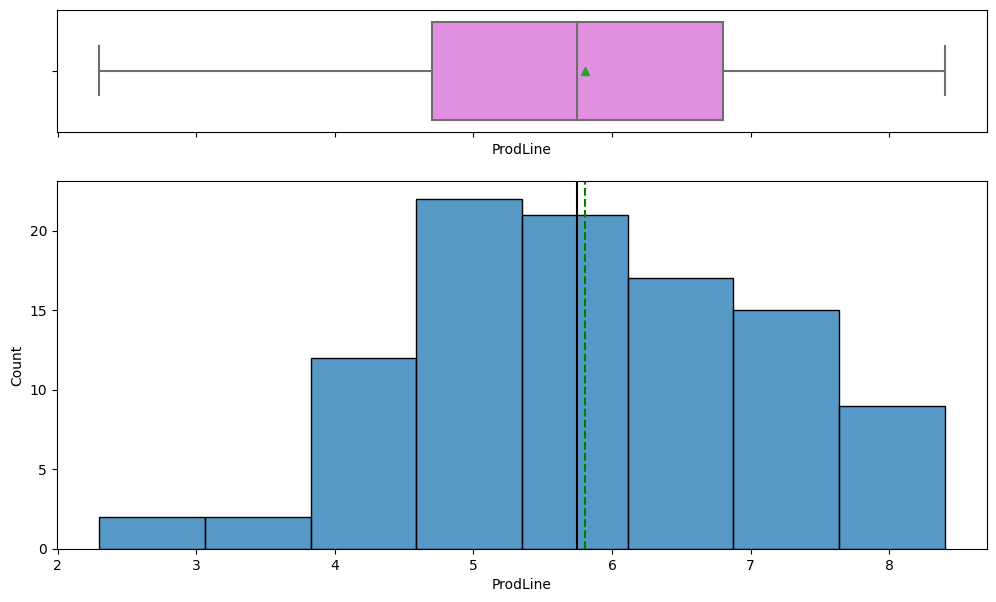

In [290]:
histogram_boxplot(data, 'ProdLine', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdLine

#### `SalesFImage`

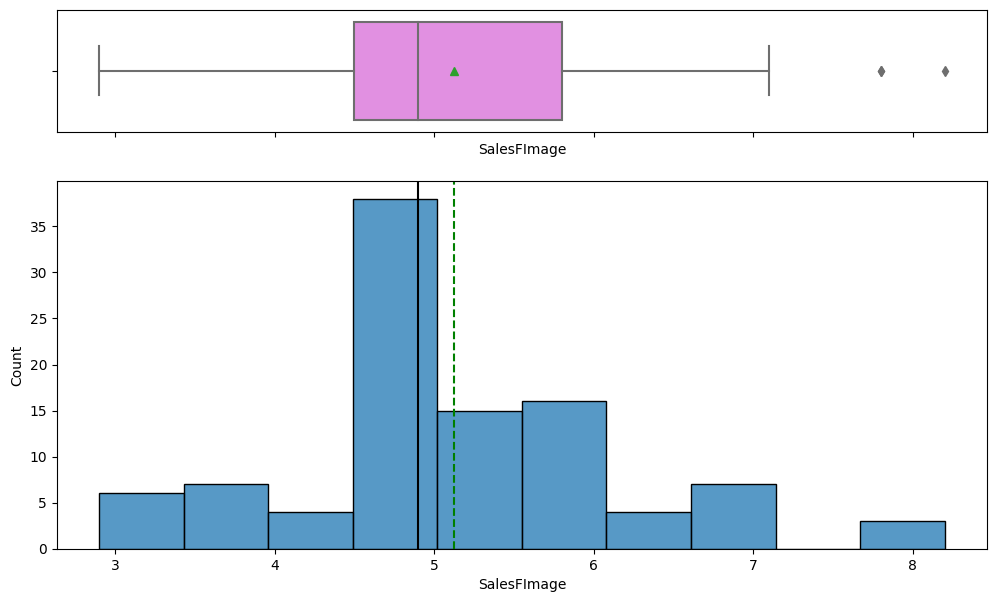

In [291]:
histogram_boxplot(data, 'SalesFImage', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for SalesFImage

#### `ComPricing`

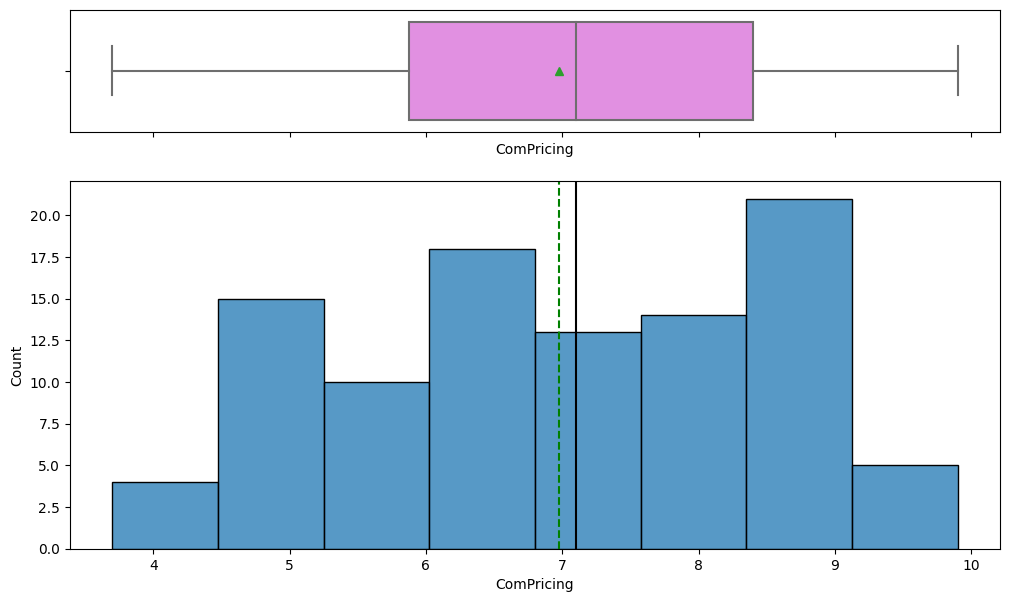

In [292]:
histogram_boxplot(data, 'ComPricing', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ComPricing

#### `WartyClaim`

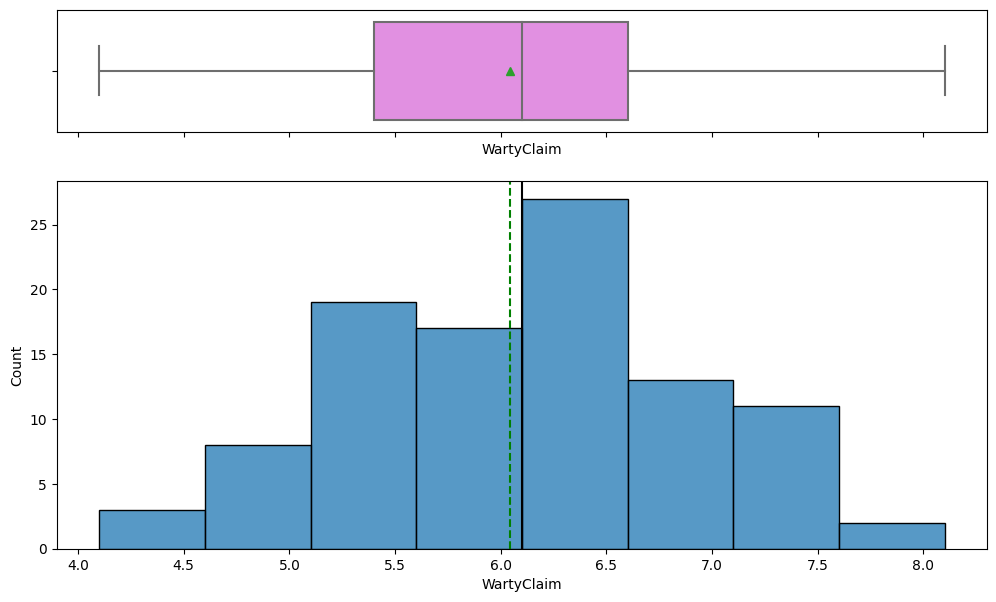

In [293]:
histogram_boxplot(data, 'WartyClaim', figsize=(12, 7), kde=False, bins=None)         ## Complete the code to plot the histogram and boxplot for WartyClaim

#### `OrdBilling`

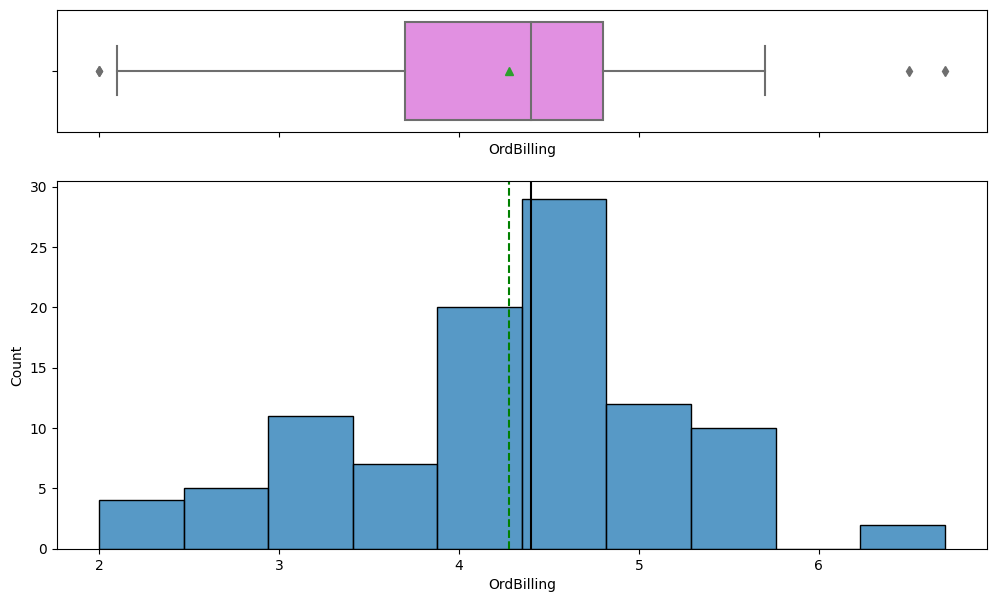

In [294]:
histogram_boxplot(data, 'OrdBilling', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for OrdBilling

#### `DelSpeed`

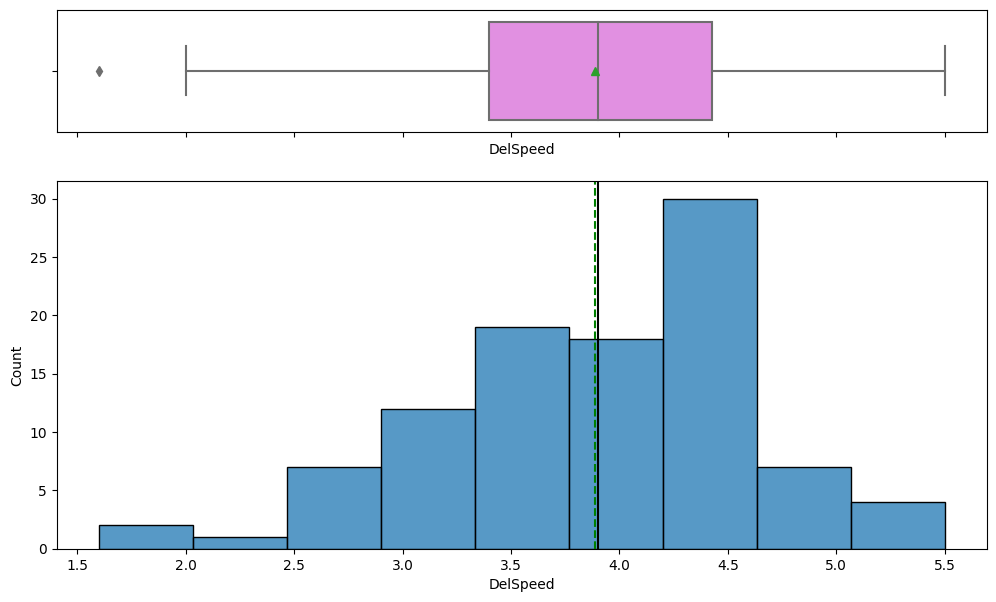

In [295]:
histogram_boxplot(data, 'DelSpeed', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for DelSpeed

### Bivariate Analysis

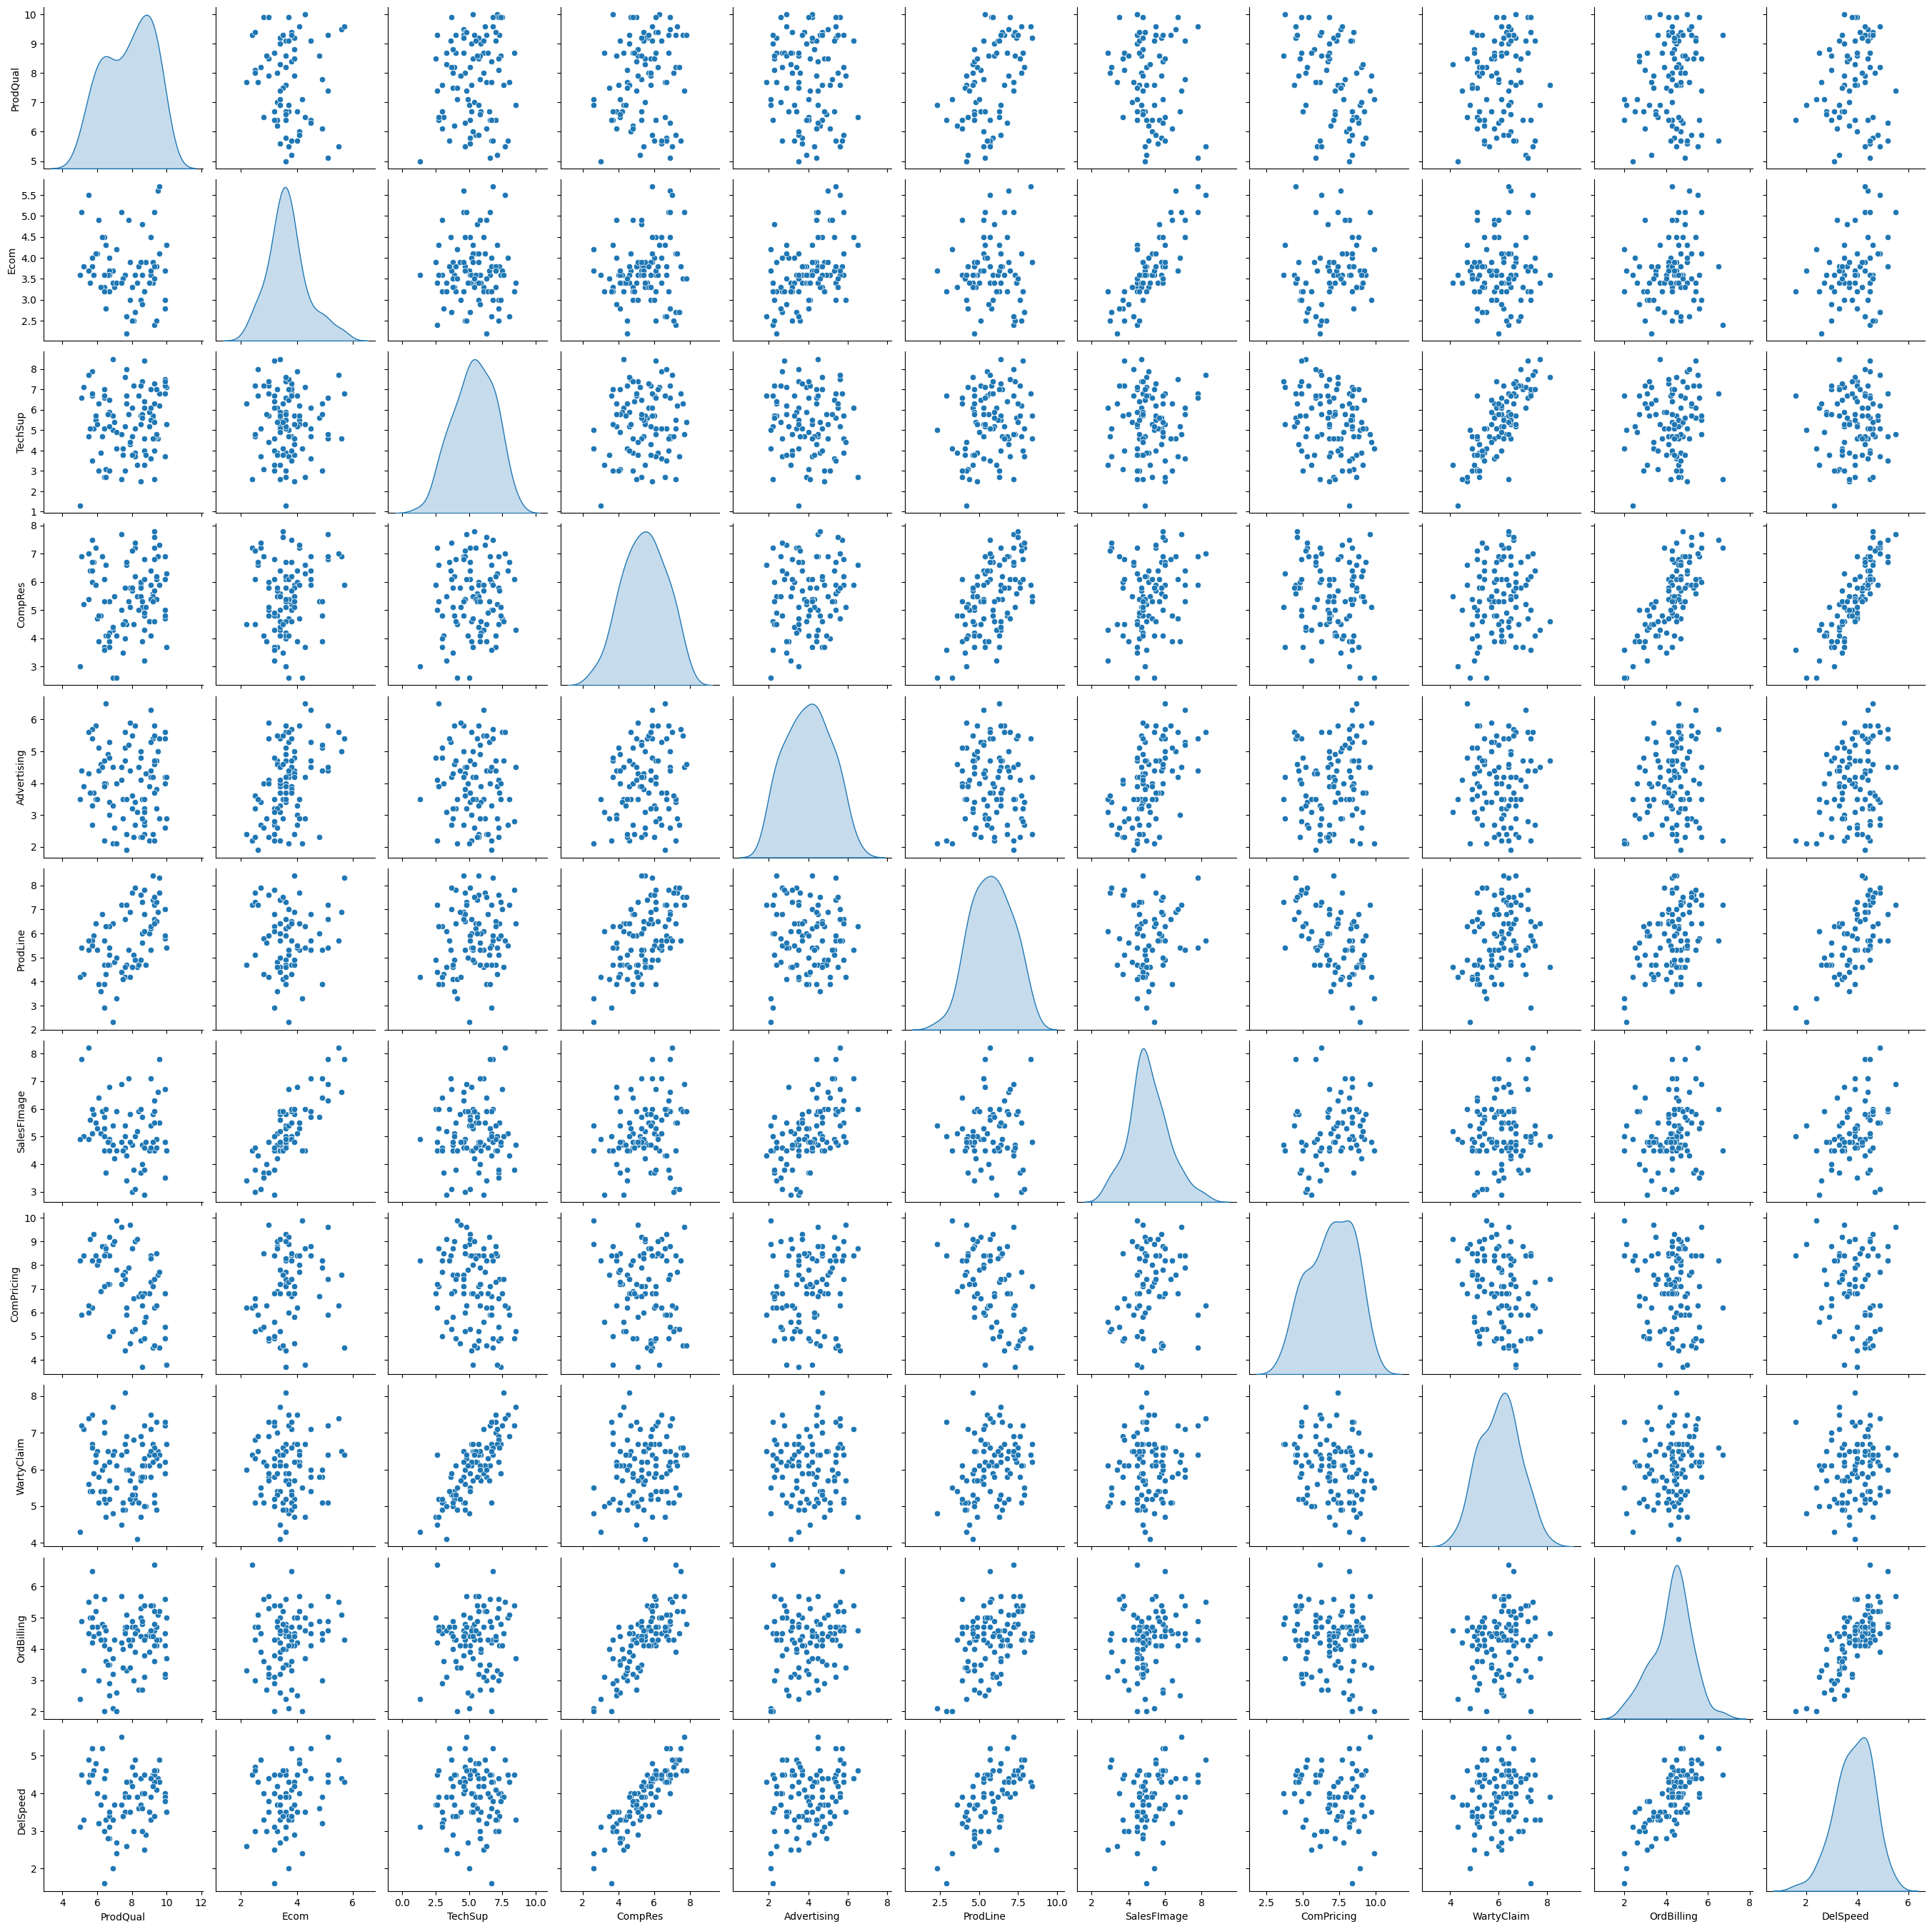

In [296]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

## Data Preprocessing

In [297]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [298]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Checking the outliers after scaling

**Use the same above code (which is used in univariate analysis) to check the outliers and add the observations.**

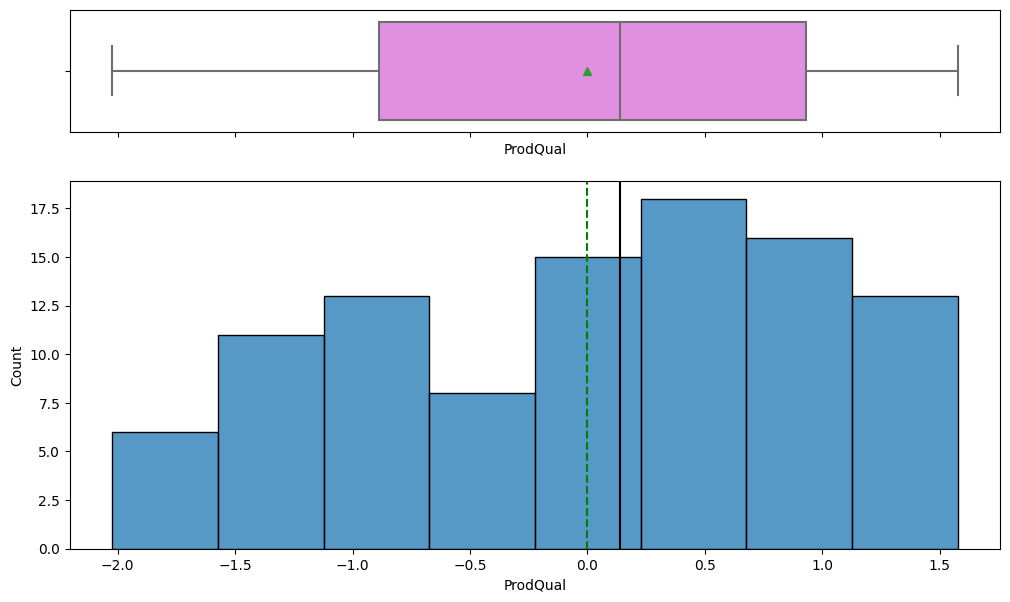

In [299]:
histogram_boxplot(subset_scaled_df, 'ProdQual', figsize=(12, 7), kde=False, bins=None)

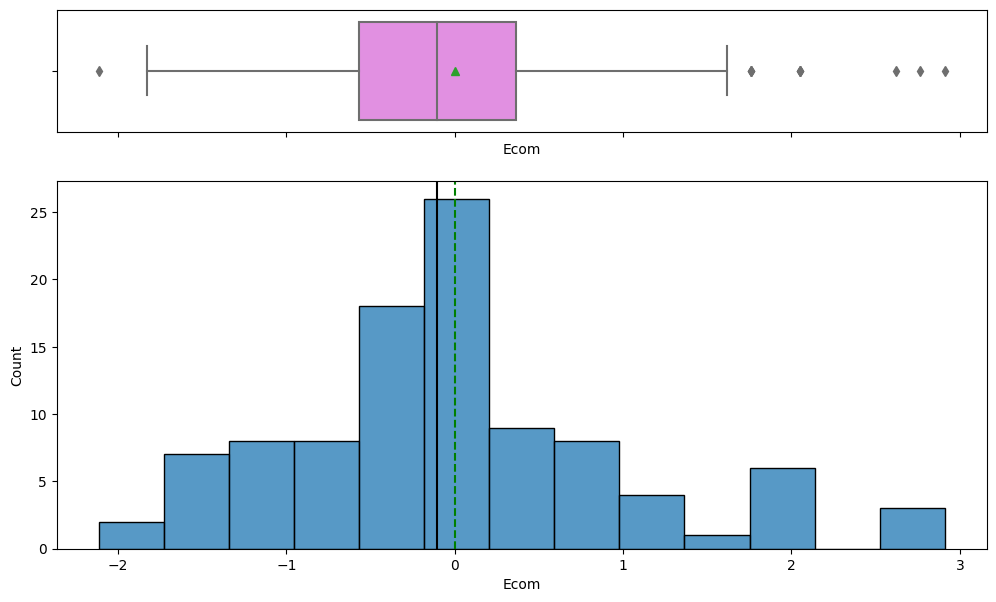

In [300]:
histogram_boxplot(subset_scaled_df, 'Ecom', figsize=(12, 7), kde=False, bins=None)

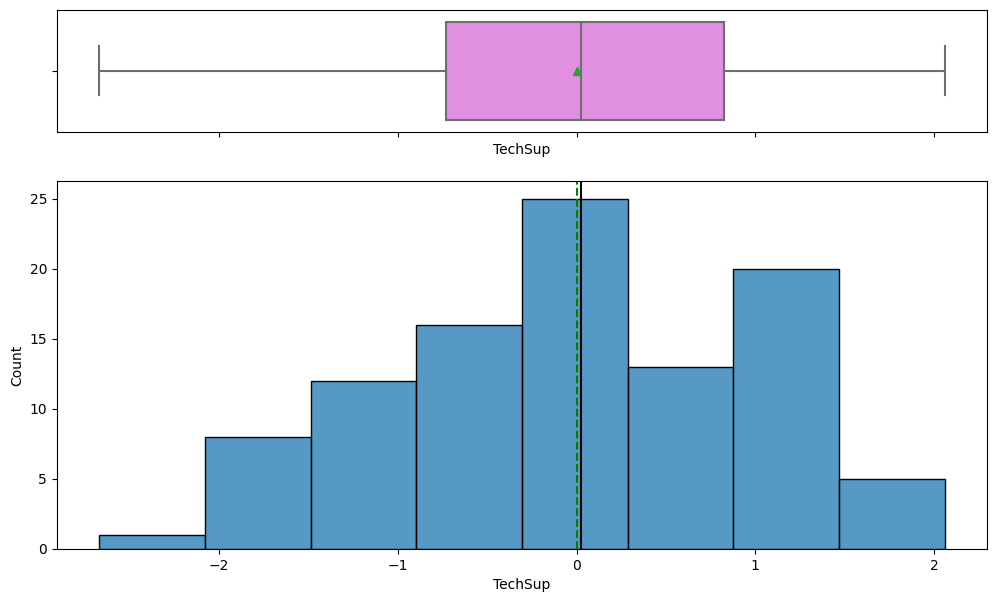

In [301]:
histogram_boxplot(subset_scaled_df, 'TechSup', figsize=(12, 7), kde=False, bins=None)

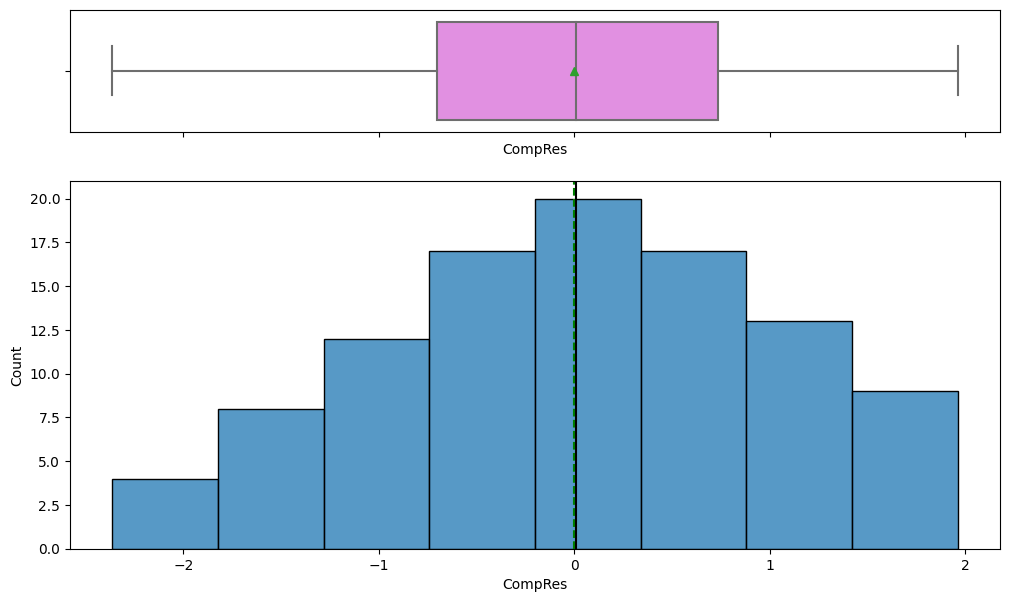

In [302]:
histogram_boxplot(subset_scaled_df, 'CompRes', figsize=(12, 7), kde=False, bins=None)

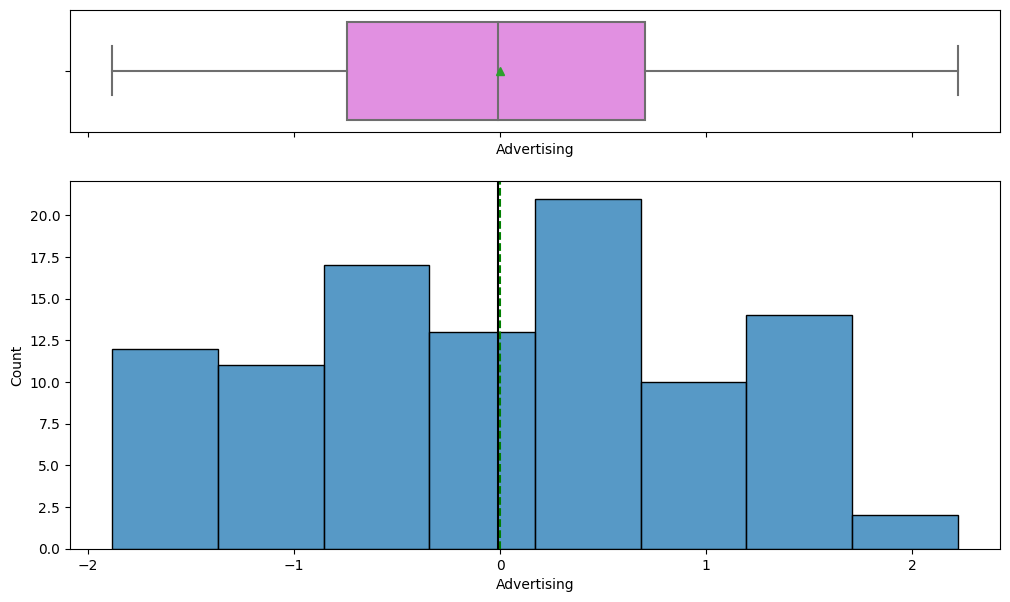

In [303]:
histogram_boxplot(subset_scaled_df, 'Advertising', figsize=(12, 7), kde=False, bins=None)

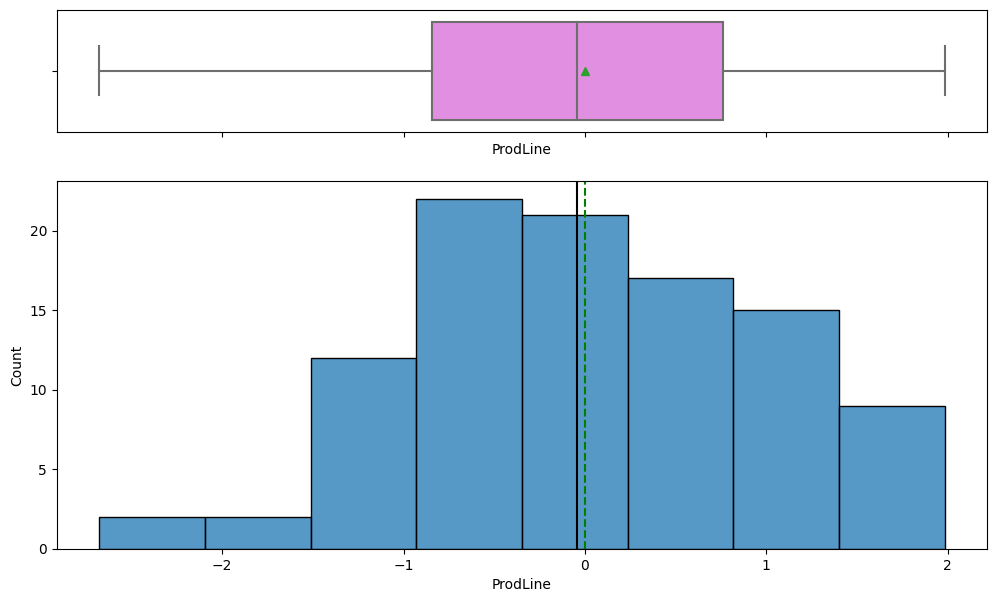

In [304]:
histogram_boxplot(subset_scaled_df, 'ProdLine', figsize=(12, 7), kde=False, bins=None)

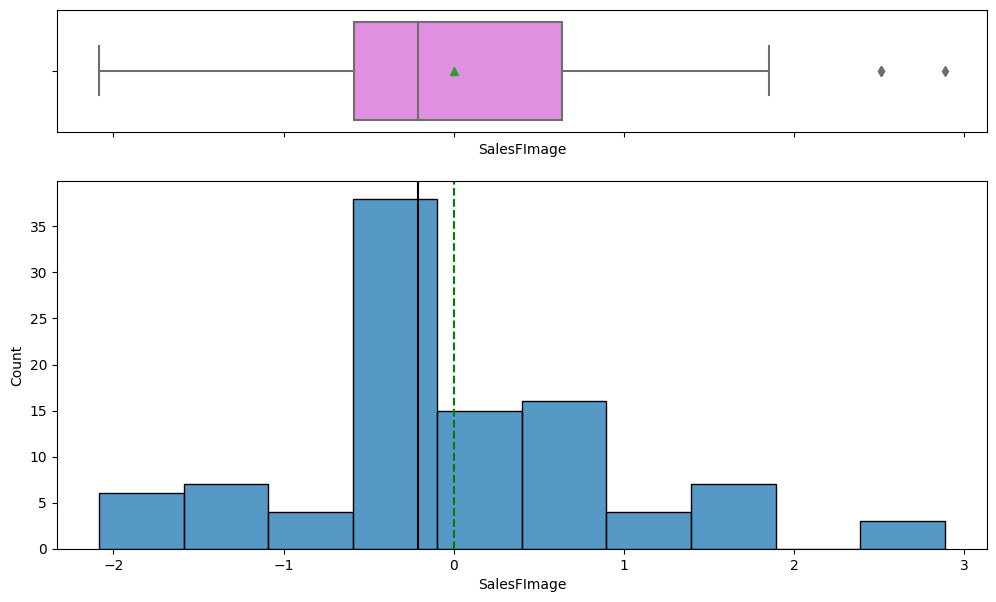

In [305]:
histogram_boxplot(subset_scaled_df, 'SalesFImage', figsize=(12, 7), kde=False, bins=None)

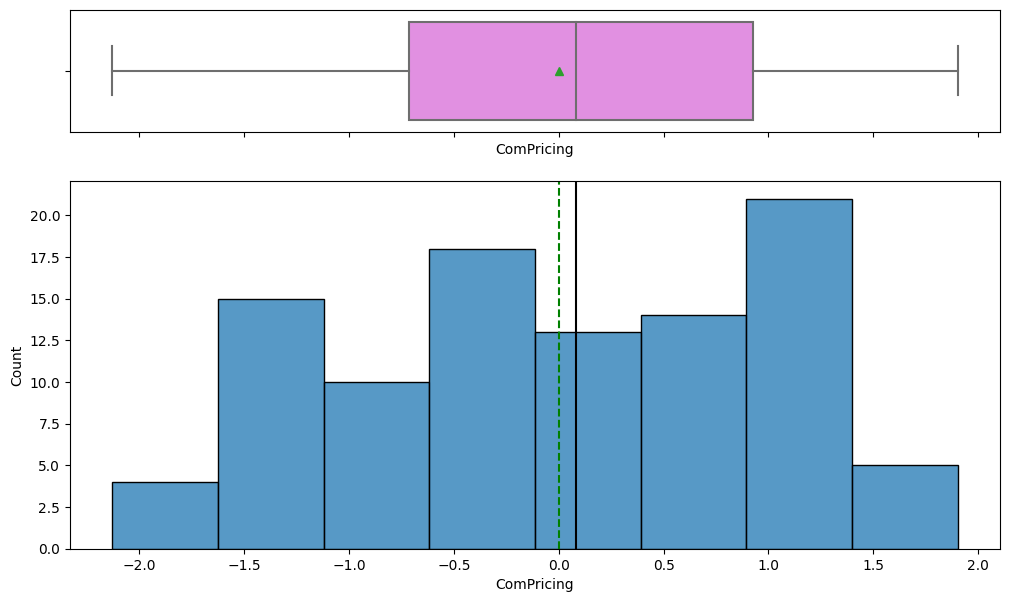

In [306]:
histogram_boxplot(subset_scaled_df, 'ComPricing', figsize=(12, 7), kde=False, bins=None)

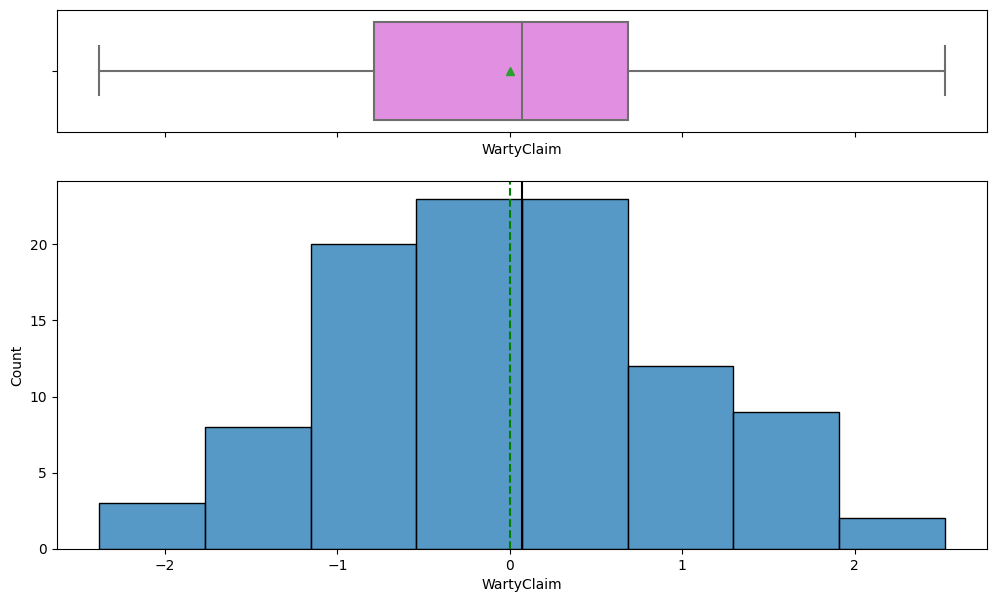

In [307]:
histogram_boxplot(subset_scaled_df, 'WartyClaim', figsize=(12, 7), kde=False, bins=None)

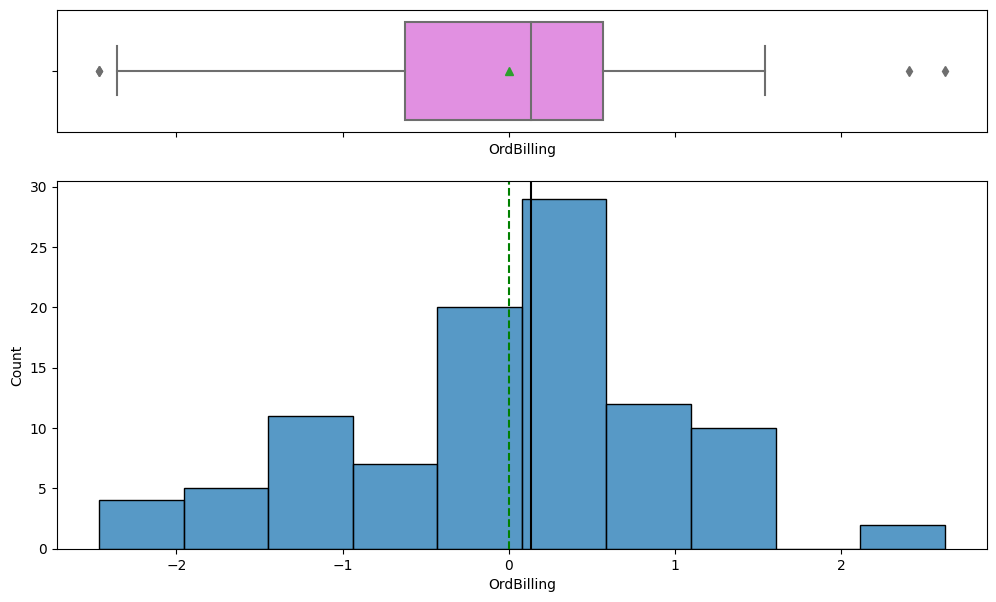

In [308]:
histogram_boxplot(subset_scaled_df, 'OrdBilling', figsize=(12, 7), kde=False, bins=None)

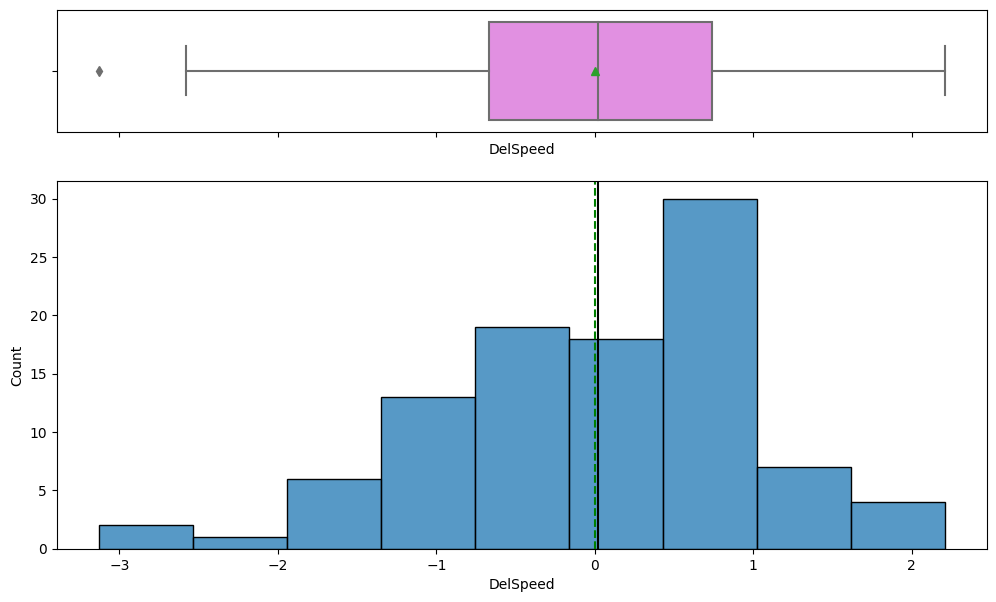

In [309]:
histogram_boxplot(subset_scaled_df, 'DelSpeed', figsize=(12, 7), kde=False, bins=None)

Post Scaling of data, the data fields appear the same as before. Variables 'ProdQual', 'TechSup', 'CompRes', 'Advertising', 'ProdLine', 'CompPricing', 'WartyClaim' are quite normally distributed. Other variables such as 'DelSpeed', 'OrdBilling', 'SalesFImage', and 'Ecom' still show some outliers. Scaling has not affected the outliers.

## Step 1- Create the covariance Matrix

In [310]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)                       ## Complete the code to apply PCA
df_pca = pca.fit_transform(subset_scaled_df)

In [311]:
pd.DataFrame(np.round(pca.get_covariance(),2),columns=subset_scaled_df.columns,index=subset_scaled_df.columns) #cov matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.01,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.11,0.03
Ecom,-0.14,1.01,0.00,0.14,0.43,-0.05,0.80,0.23,0.05,0.16,0.19
TechSup,0.10,0.00,1.01,0.10,-0.06,0.19,0.02,-0.27,0.81,0.08,0.03
CompRes,0.11,0.14,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.76,0.87
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28
ProdLine,0.48,-0.05,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61
SalesFImage,-0.15,0.80,0.02,0.23,0.55,-0.06,1.01,0.27,0.11,0.20,0.27
ComPricing,-0.41,0.23,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.12,-0.07
WartyClaim,0.09,0.05,0.81,0.14,0.01,0.28,0.11,-0.25,1.01,0.20,0.11
OrdBilling,0.11,0.16,0.08,0.76,0.19,0.43,0.20,-0.12,0.20,1.01,0.76


## Step 2- Get eigen values and eigen vector

In [312]:
eigenvec=pca.components_                                      ## Complete the code to apply PCA components
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[-0.13 -0.17 -0.16 -0.47 -0.18 -0.39 -0.2   0.15 -0.21 -0.44 -0.47]
 [-0.31  0.45 -0.23  0.02  0.36 -0.28  0.47  0.41 -0.19  0.03  0.07]
 [ 0.06 -0.24 -0.61  0.21 -0.09  0.12 -0.24  0.05 -0.6   0.17  0.23]
 [ 0.64  0.27 -0.19 -0.21  0.32  0.2   0.22 -0.33 -0.19 -0.24 -0.2 ]
 [ 0.23  0.42 -0.02  0.03 -0.8   0.12  0.2   0.25 -0.03  0.03 -0.04]
 [-0.56  0.26 -0.11 -0.03 -0.2   0.1   0.1  -0.71 -0.14 -0.12  0.03]
 [ 0.19  0.06 -0.02 -0.01 -0.06 -0.61  0.   -0.31 -0.03  0.66 -0.23]
 [ 0.14 -0.12  0.46  0.51 -0.05 -0.33  0.17 -0.1  -0.44 -0.37  0.07]
 [ 0.03 -0.54 -0.36  0.09 -0.15 -0.08  0.64 -0.09  0.32 -0.1  -0.02]
 [ 0.07  0.28 -0.39  0.53  0.04 -0.23 -0.35 -0.05  0.44 -0.3  -0.12]
 [ 0.18  0.06 -0.05 -0.36 -0.08 -0.39 -0.08 -0.1   0.13 -0.19  0.78]]


In [313]:
eigenvalues=pca.explained_variance_                                   ## Complete the code to apply PCA Explained Variance
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.46 2.58 1.71 1.1  0.62 0.56 0.41 0.25 0.21 0.13 0.1 ]


In [314]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [315]:
var_exp

array([31., 23., 15., 10.,  6.,  5.,  4.,  2.,  2.,  1.,  1.])

## Step 3 View Scree Plot to identify the number of components to be built

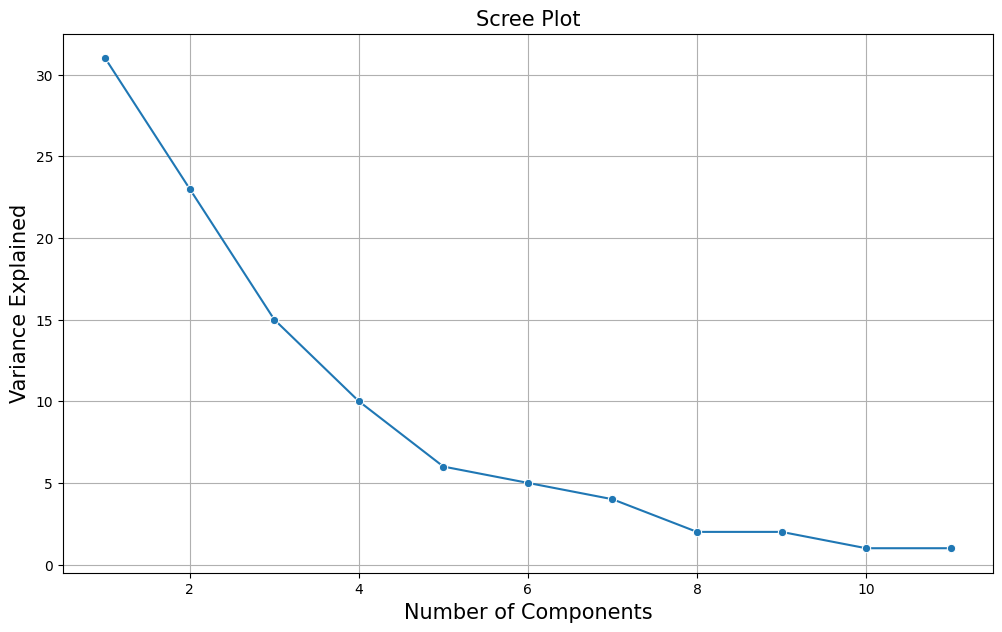

In [316]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The first two principal compnents explain more than 50% variance in the data.

## Step 4 Apply PCA for the number of decided components to get the loadings and component output

In [317]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=123)        ## Complete the code to apply the appropriate PCA components from the above plot
df_pca = pca.fit_transform(subset_scaled_df)
df_pca.transpose() # Component output

array([[ 0.0795508 , -1.10096634, -2.19706653,  1.56293289,  0.76757039,
         2.90862177,  5.29319132,  1.47659077, -0.61394761, -0.42366008,
         0.57625231,  1.86757037, -2.66029481, -1.15437973, -1.98252867,
        -1.19534642, -0.6292106 , -1.94912563, -0.44065433, -1.18679105,
         1.32903312, -3.07501457, -1.22862294, -1.9521566 ,  0.27711435,
        -0.33863508, -1.7647172 ,  1.0351017 , -1.29479142,  1.66262708,
         0.14460849,  2.1146274 ,  1.06970726, -0.10940809,  1.80536022,
         2.1224852 ,  0.62205111, -2.57411754, -0.34496698,  1.21539637,
         1.25487586,  0.16793078, -1.82095895, -2.33269255, -0.87328888,
        -1.65347263, -1.03184895, -3.12115015, -1.07236222, -0.79767523,
         1.98945764, -1.15121892, -1.07789784,  1.16797753,  0.52852266,
        -0.3768932 , -3.50943905, -1.28569623,  0.57436837, -1.10762365,
        -2.11898365,  1.19627748,  1.22409809,  2.78237859,  1.83048999,
        -1.25224924, -1.39907113,  0.0918897 ,  2.5

In [318]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(subset_scaled_df),index=['PC0','PC1'])
df_pca_loading.shape

(2, 11)

In [319]:
df_pca_loading = np.round(df_pca_loading,2)

In [320]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC0,-0.130000,-0.170000,-0.160000,-0.470000,-0.180000,-0.390000,-0.200000,0.150000,-0.210000,-0.440000,-0.470000
PC1,-0.310000,0.450000,-0.230000,0.020000,0.360000,-0.280000,0.470000,0.410000,-0.190000,0.030000,0.070000


In [321]:
# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=df_pca, columns=["Component 1", "Component 2"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

The first two principal components explain 54.34% of the variance in the data.


<Axes: xlabel='Component 1', ylabel='Component 2'>

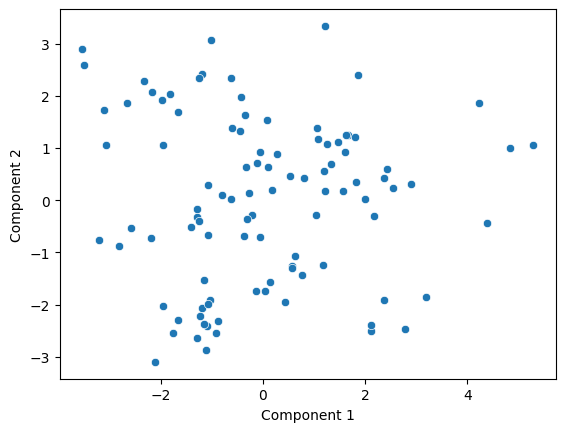

In [322]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

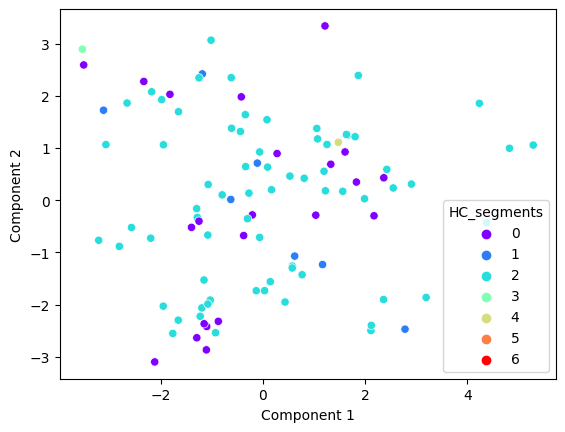

In [323]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)

In [324]:
# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_                           ## Complete the code to get the explained variance

# Interpretation of principal components
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Display results
print("Explained Variance Ratio:", explained_var_ratio)
print("Principal Component 1 Loadings:", pc1_loadings)
print("Principal Component 2 Loadings:", pc2_loadings)

Explained Variance Ratio: [0.31154285 0.2318997 ]
Principal Component 1 Loadings: [-0.13378962 -0.16595278 -0.15769263 -0.47068359 -0.18373495 -0.38676517
 -0.2036696   0.15168864 -0.21293363 -0.43721774 -0.47308914]
Principal Component 2 Loadings: [-0.31349802  0.44650918 -0.23096734  0.01944394  0.36366471 -0.28478056
  0.47069599  0.4134565  -0.19167191  0.02639905  0.07305172]


In [325]:
# Cumulative explained variance ratio
cumulative_explained_var = np.cumsum(pca.explained_variance_ratio_)           ## Complete the code to get the cumulative explained variance

# Display results
print("Cumulative Explained Variance:", cumulative_explained_var)

Cumulative Explained Variance: [0.31154285 0.54344255]


In [326]:
# Applying K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=1)
labels_original = kmeans_original.fit_predict(subset_scaled_df)

In [327]:
# Applying K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=1)
labels_pca = kmeans_pca.fit_predict(df_pca)

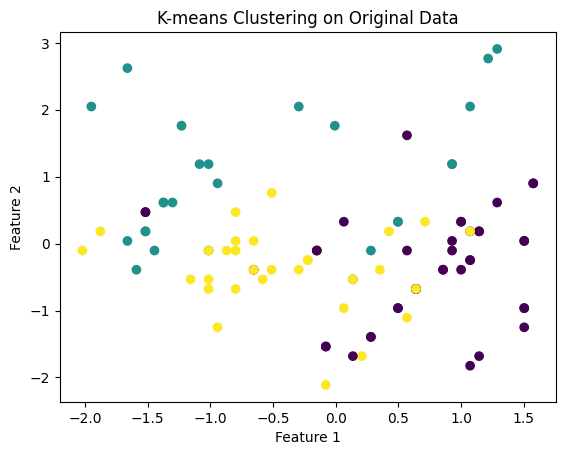

In [328]:
import matplotlib.pyplot as plt

plt.scatter(subset_scaled_df.iloc[:, 0], subset_scaled_df.iloc[:, 1], c=labels_original, cmap='viridis')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


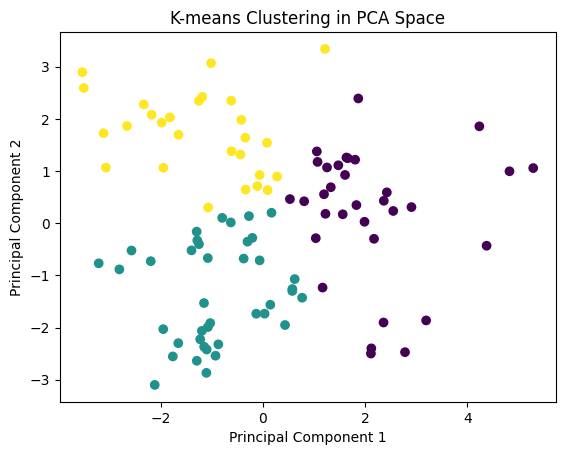

In [329]:
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title('K-means Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Quite evidently, K-Means clusters developed on PCA transforned data are much more distinct.